In [1]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, Legend, LegendItem
from bokeh.layouts import column
from bokeh.io import output_notebook
from bokeh.models import HoverTool
from bokeh.palettes import Category20  
import itertools
from mpl_toolkits.basemap import Basemap
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import calplot
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon

### 1- Data Preprocessing

Loading of Hourly Weather dataset for Galicia btw 01-01-2000 00:00 to 30-04-2024 23:00

In [2]:
galicia_weather = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\Galicia_hourly_weather_data_00_24.csv")
galicia_weather.head(5)

time  temperature_2m (°C)  relative_humidity_2m (%)  \
0  2000-01-01T00:00                  1.9                        83   
1  2000-01-01T01:00                  1.3                        85   
2  2000-01-01T02:00                 -0.1                        89   
3  2000-01-01T03:00                 -1.7                        92   
4  2000-01-01T04:00                 -2.2                        92   

   dew_point_2m (°C)  precipitation (mm)  pressure_msl (hPa)  \
0               -0.7                 0.0              1029.0   
1               -0.9                 0.0              1029.2   
2               -1.7                 0.0              1029.3   
3               -2.9                 0.0              1028.8   
4               -3.3                 0.0              1028.7   

   surface_pressure (hPa)  cloud_cover (%)  et0_fao_evapotranspiration (mm)  \
0                   963.6               29                              0.0   
1                   963.6               24                              0.0   
2                   963.4               24                              0.0   
3                   962.6               16                              0.0   
4                   962.4                8                              0.0   

   vapour_pressure_deficit (kPa)  ...  soil_moisture_7_to_28cm (m³/m³)  \
0                           0.12  ...                            0.403   
1                           0.10  ...                            0.402   
2                           0.07  ...                            0.402   
3                           0.05  ...                            0.402   
4                           0.04  ...                            0.402   

   soil_moisture_28_to_100cm (m³/m³)  soil_moisture_100_to_255cm (m³/m³)  \
0                              0.415                               0.399   
1                              0.415                               0.399   
2                              0.415                               0.399   
3                              0.415                               0.399   
4                              0.414                               0.399   

   is_day ()  sunshine_duration (s)  shortwave_radiation_instant (W/m²)  \
0          0                    0.0                                 0.0   
1          0                    0.0                                 0.0   
2          0                    0.0                                 0.0   
3          0                    0.0                                 0.0   
4          0                    0.0                                 0.0   

   direct_radiation_instant (W/m²)  diffuse_radiation_instant (W/m²)  \
0                              0.0                               0.0   
1                              0.0                               0.0   
2                              0.0                               0.0   
3                              0.0                               0.0   
4                              0.0                               0.0   

   direct_normal_irradiance_instant (W/m²)  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   terrestrial_radiation_instant (W/m²)  
0                                   0.0  
1                                   0.0  
2                                   0.0  
3                                   0.0  
4                                   0.0  

[5 rows x 27 columns]

In [3]:
galicia_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213288 entries, 0 to 213287
Data columns (total 27 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   time                                     213288 non-null  object 
 1   temperature_2m (°C)                      213288 non-null  float64
 2   relative_humidity_2m (%)                 213288 non-null  int64  
 3   dew_point_2m (°C)                        213288 non-null  float64
 4   precipitation (mm)                       213288 non-null  float64
 5   pressure_msl (hPa)                       213288 non-null  float64
 6   surface_pressure (hPa)                   213288 non-null  float64
 7   cloud_cover (%)                          213288 non-null  int64  
 8   et0_fao_evapotranspiration (mm)          213288 non-null  float64
 9   vapour_pressure_deficit (kPa)            213288 non-null  float64
 10  wind_speed_10m (km/h)           

Loading the Modis fire dataset 2001-2022

In [4]:
fire2022 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2022_Spain.csv")
fire2021 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2021_Spain.csv")
fire2020 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2020_Spain.csv")
fire2019 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2019_Spain.csv")
fire2018 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2018_Spain.csv")
fire2017 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2017_Spain.csv")
fire2016 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2016_Spain.csv")
fire2015 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2015_Spain.csv")
fire2014 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2014_Spain.csv")
fire2013 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2013_Spain.csv")
fire2012 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2012_Spain.csv")
fire2011 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2011_Spain.csv")
fire2010 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2010_Spain.csv")
fire2009 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2009_Spain.csv")
fire2008 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2008_Spain.csv")
fire2007 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2007_Spain.csv")
fire2006 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2006_Spain.csv")
fire2005 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2005_Spain.csv")
fire2004 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2004_Spain.csv")
fire2003 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2003_Spain.csv")
fire2002 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2002_Spain.csv")
fire2001 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2001_Spain.csv")
fire2000 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_incidents_galicia\modis_2000_Spain.csv")
fire2016.head(5)

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   40.4253    -1.4254       305.4   1.5    1.2  2016-01-05      1125   
1   37.5847    -5.8172       302.1   1.1    1.0  2016-01-05      1126   
2   38.7263    -0.7202       301.5   1.1    1.0  2016-01-05      1304   
3   38.7225    -0.7440       300.5   1.1    1.0  2016-01-05      1304   
4   38.7153    -0.7298       326.4   1.1    1.0  2016-01-05      1304   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          61      6.2       277.4  18.2        D     0  
1     Terra      MODIS          48      6.2       284.7   6.9        D     0  
2      Aqua      MODIS          32      6.2       286.5   5.9        D     0  
3      Aqua      MODIS          22      6.2       285.9   5.2        D     0  
4      Aqua      MODIS          80      6.2       286.8  27.7        D     0

In [5]:
fire2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    3211 non-null   float64
 1   longitude   3211 non-null   float64
 2   brightness  3211 non-null   float64
 3   scan        3211 non-null   float64
 4   track       3211 non-null   float64
 5   acq_date    3211 non-null   object 
 6   acq_time    3211 non-null   int64  
 7   satellite   3211 non-null   object 
 8   instrument  3211 non-null   object 
 9   confidence  3211 non-null   int64  
 10  version     3211 non-null   float64
 11  bright_t31  3211 non-null   float64
 12  frp         3211 non-null   float64
 13  daynight    3211 non-null   object 
 14  type        3211 non-null   int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 376.4+ KB


In [6]:
merged_forest_fire_incidents_galicia_2000_2022=pd.concat([fire2000,fire2001,fire2002,fire2003,fire2004,fire2005,fire2006
                                                         ,fire2007,fire2008,fire2009,fire2010,fire2011,fire2012,fire2013
                                                         ,fire2014,fire2015,fire2016,fire2017,fire2018,fire2019,fire2020
                                                         ,fire2021,fire2022], axis=0)
merged_forest_fire_incidents_galicia_2000_2022.reset_index(drop=True, inplace=True)

In [7]:
merged_forest_fire_incidents_galicia_2000_2022.head(5)

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   43.5249    -5.7303       301.1   1.0    1.0  2000-11-01      1131   
1   41.5184    -2.0833       312.4   1.1    1.1  2000-11-01      1132   
2   41.3399    -2.6720       309.7   1.1    1.0  2000-11-01      1132   
3   40.2732    -3.1756       319.2   1.1    1.0  2000-11-01      1132   
4   40.2479    -3.4714       304.2   1.1    1.0  2000-11-01      1132   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          45      6.2       269.8   7.8        D     2  
1     Terra      MODIS          55      6.2       280.1  15.8        D     0  
2     Terra      MODIS           0      6.2       274.0  12.6        D     0  
3     Terra      MODIS          79      6.2       288.3  19.9        D     0  
4     Terra      MODIS          58      6.2       285.4   6.1        D     0

In [8]:
min_longitude, max_longitude = -9.30, -6.73
min_latitude, max_latitude = 41.8, 43.8

In [9]:
filtered_galicia_fires_00_22 = merged_forest_fire_incidents_galicia_2000_2022[
    (merged_forest_fire_incidents_galicia_2000_2022['longitude'] >= min_longitude) &
    (merged_forest_fire_incidents_galicia_2000_2022['longitude'] <= max_longitude) &
    (merged_forest_fire_incidents_galicia_2000_2022['latitude'] >= min_latitude) &
    (merged_forest_fire_incidents_galicia_2000_2022['latitude'] <= max_latitude)
]

In [10]:
filtered_galicia_fires_00_22.head(5)

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
172   42.5118    -8.4374       300.4   1.1    1.0  2001-02-17      1154   
177   42.2953    -8.2946       305.0   1.0    1.0  2001-02-19      1142   
178   42.2688    -8.2864       311.8   1.0    1.0  2001-02-19      2248   
186   42.2428    -6.8630       314.8   1.1    1.0  2001-02-21      1130   
187   42.2881    -8.3451       317.1   1.2    1.1  2001-02-21      1130   

    satellite instrument  confidence  version  bright_t31   frp daynight  type  
172     Terra      MODIS          36      6.2       286.7   5.6        D     0  
177     Terra      MODIS          60      6.2       283.9   8.7        D     0  
178     Terra      MODIS          83      6.2       275.9  16.2        N     0  
186     Terra      MODIS          71      6.2       279.2  15.2        D     0  
187     Terra      MODIS          77      6.2       288.3  20.2        D     0

In [11]:
# Drop multiple columns
filtered_galicia_fires_00_22 = filtered_galicia_fires_00_22.drop(['satellite', 'instrument','version'], axis=1)
filtered_galicia_fires_00_22.head(5)

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
172   42.5118    -8.4374       300.4   1.1    1.0  2001-02-17      1154   
177   42.2953    -8.2946       305.0   1.0    1.0  2001-02-19      1142   
178   42.2688    -8.2864       311.8   1.0    1.0  2001-02-19      2248   
186   42.2428    -6.8630       314.8   1.1    1.0  2001-02-21      1130   
187   42.2881    -8.3451       317.1   1.2    1.1  2001-02-21      1130   

     confidence  bright_t31   frp daynight  type  
172          36       286.7   5.6        D     0  
177          60       283.9   8.7        D     0  
178          83       275.9  16.2        N     0  
186          71       279.2  15.2        D     0  
187          77       288.3  20.2        D     0

Merged and filtered fire data for galicia coordinates

In [12]:
filtered_galicia_fires_00_22 = filtered_galicia_fires_00_22.dropna()
filtered_galicia_fires_00_22.head(5)

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
172   42.5118    -8.4374       300.4   1.1    1.0  2001-02-17      1154   
177   42.2953    -8.2946       305.0   1.0    1.0  2001-02-19      1142   
178   42.2688    -8.2864       311.8   1.0    1.0  2001-02-19      2248   
186   42.2428    -6.8630       314.8   1.1    1.0  2001-02-21      1130   
187   42.2881    -8.3451       317.1   1.2    1.1  2001-02-21      1130   

     confidence  bright_t31   frp daynight  type  
172          36       286.7   5.6        D     0  
177          60       283.9   8.7        D     0  
178          83       275.9  16.2        N     0  
186          71       279.2  15.2        D     0  
187          77       288.3  20.2        D     0

In [13]:
filtered_galicia_fires_00_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22277 entries, 172 to 100087
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    22277 non-null  float64
 1   longitude   22277 non-null  float64
 2   brightness  22277 non-null  float64
 3   scan        22277 non-null  float64
 4   track       22277 non-null  float64
 5   acq_date    22277 non-null  object 
 6   acq_time    22277 non-null  int64  
 7   confidence  22277 non-null  int64  
 8   bright_t31  22277 non-null  float64
 9   frp         22277 non-null  float64
 10  daynight    22277 non-null  object 
 11  type        22277 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 2.2+ MB


Parsing of weather and fire dataset to add column indicate month year day of week etc.

In [14]:
galicia_weather['time'] = pd.to_datetime(galicia_weather['time'], format='%Y-%m-%dT%H:%M')

# Extract the year
galicia_weather['year'] = galicia_weather['time'].dt.year

# Define a function to assign seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 1  # Winter
    elif month in [3, 4, 5]:
        return 2  # Spring
    elif month in [6, 7, 8]:
        return 3  # Summer
    else:
        return 4  # Autumn

# Apply the function to the DataFrame
galicia_weather['season'] = galicia_weather['time'].dt.month.apply(get_season)

# Extract the month
galicia_weather['month'] = galicia_weather['time'].dt.month

# Extract the week of the year
galicia_weather['week'] = galicia_weather['time'].dt.isocalendar().week

# Extract the day of the week (1 = Monday, 7 = Sunday)
galicia_weather['day_of_week'] = galicia_weather['time'].dt.dayofweek + 1

# Extract the hour (24-hour format)
galicia_weather['hour'] = galicia_weather['time'].dt.hour + 1

# Extract the day of the month
galicia_weather['day_of_month'] = galicia_weather['time'].dt.day

# Extract the day of the year
galicia_weather['day_of_year'] = galicia_weather['time'].dt.dayofyear

galicia_weather.head(5)

time  temperature_2m (°C)  relative_humidity_2m (%)  \
0 2000-01-01 00:00:00                  1.9                        83   
1 2000-01-01 01:00:00                  1.3                        85   
2 2000-01-01 02:00:00                 -0.1                        89   
3 2000-01-01 03:00:00                 -1.7                        92   
4 2000-01-01 04:00:00                 -2.2                        92   

   dew_point_2m (°C)  precipitation (mm)  pressure_msl (hPa)  \
0               -0.7                 0.0              1029.0   
1               -0.9                 0.0              1029.2   
2               -1.7                 0.0              1029.3   
3               -2.9                 0.0              1028.8   
4               -3.3                 0.0              1028.7   

   surface_pressure (hPa)  cloud_cover (%)  et0_fao_evapotranspiration (mm)  \
0                   963.6               29                              0.0   
1                   963.6               24                              0.0   
2                   963.4               24                              0.0   
3                   962.6               16                              0.0   
4                   962.4                8                              0.0   

   vapour_pressure_deficit (kPa)  ...  \
0                           0.12  ...   
1                           0.10  ...   
2                           0.07  ...   
3                           0.05  ...   
4                           0.04  ...   

   direct_normal_irradiance_instant (W/m²)  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   terrestrial_radiation_instant (W/m²)  year  season  month  week  \
0                                   0.0  2000       1      1    52   
1                                   0.0  2000       1      1    52   
2                                   0.0  2000       1      1    52   
3                                   0.0  2000       1      1    52   
4                                   0.0  2000       1      1    52   

   day_of_week  hour  day_of_month  day_of_year  
0            6     1             1            1  
1            6     2             1            1  
2            6     3             1            1  
3            6     4             1            1  
4            6     5             1            1  

[5 rows x 35 columns]

In [15]:
galicia_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213288 entries, 0 to 213287
Data columns (total 35 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   time                                     213288 non-null  datetime64[ns]
 1   temperature_2m (°C)                      213288 non-null  float64       
 2   relative_humidity_2m (%)                 213288 non-null  int64         
 3   dew_point_2m (°C)                        213288 non-null  float64       
 4   precipitation (mm)                       213288 non-null  float64       
 5   pressure_msl (hPa)                       213288 non-null  float64       
 6   surface_pressure (hPa)                   213288 non-null  float64       
 7   cloud_cover (%)                          213288 non-null  int64         
 8   et0_fao_evapotranspiration (mm)          213288 non-null  float64       
 9   vapour_pressure_deficit (k

In [16]:
# Convert 'acq_date' to a datetime object
filtered_galicia_fires_00_22['acq_date'] = pd.to_datetime(filtered_galicia_fires_00_22['acq_date'], format='%Y-%m-%d')

# Convert 'acq_time' to hh:mm format and then to a time object
filtered_galicia_fires_00_22['acq_time'] = filtered_galicia_fires_00_22['acq_time'].apply(lambda x: pd.to_datetime(x, format='%H%M').time())

# Combine 'acq_date' and 'acq_time' into a single datetime column
filtered_galicia_fires_00_22['datetime'] = filtered_galicia_fires_00_22.apply(lambda row: pd.Timestamp.combine(row['acq_date'], row['acq_time']), axis=1)

# Extract the year
filtered_galicia_fires_00_22['year'] = filtered_galicia_fires_00_22['datetime'].dt.year

# Define a function to assign seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 1  # Winter
    elif month in [3, 4, 5]:
        return 2  # Spring
    elif month in [6, 7, 8]:
        return 3  # Summer
    else:
        return 4  # Autumn

# Apply the function to the DataFrame
filtered_galicia_fires_00_22['season'] = filtered_galicia_fires_00_22['datetime'].dt.month.apply(get_season)

# Extract the month
filtered_galicia_fires_00_22['month'] = filtered_galicia_fires_00_22['datetime'].dt.month

# Extract the week of the year
filtered_galicia_fires_00_22['week'] = filtered_galicia_fires_00_22['datetime'].dt.isocalendar().week

# Extract the day of the week (1 = Monday, 7 = Sunday)
filtered_galicia_fires_00_22['day_of_week'] = filtered_galicia_fires_00_22['datetime'].dt.dayofweek + 1

# Extract the hour (24-hour format)
filtered_galicia_fires_00_22['hour'] = filtered_galicia_fires_00_22['datetime'].dt.hour + 1

# Extract the day of the month
filtered_galicia_fires_00_22['day_of_month'] = filtered_galicia_fires_00_22['datetime'].dt.day

# Extract the day of the year
filtered_galicia_fires_00_22['day_of_year'] = filtered_galicia_fires_00_22['datetime'].dt.dayofyear

# Display the first 5 rows
filtered_galicia_fires_00_22.head(5)

latitude  longitude  brightness  scan  track   acq_date  acq_time  \
172   42.5118    -8.4374       300.4   1.1    1.0 2001-02-17  11:54:00   
177   42.2953    -8.2946       305.0   1.0    1.0 2001-02-19  11:42:00   
178   42.2688    -8.2864       311.8   1.0    1.0 2001-02-19  22:48:00   
186   42.2428    -6.8630       314.8   1.1    1.0 2001-02-21  11:30:00   
187   42.2881    -8.3451       317.1   1.2    1.1 2001-02-21  11:30:00   

     confidence  bright_t31   frp  ... type            datetime  year  season  \
172          36       286.7   5.6  ...    0 2001-02-17 11:54:00  2001       1   
177          60       283.9   8.7  ...    0 2001-02-19 11:42:00  2001       1   
178          83       275.9  16.2  ...    0 2001-02-19 22:48:00  2001       1   
186          71       279.2  15.2  ...    0 2001-02-21 11:30:00  2001       1   
187          77       288.3  20.2  ...    0 2001-02-21 11:30:00  2001       1   

     month  week  day_of_week  hour  day_of_month  day_of_year  
172      2     7            6    12            17           48  
177      2     8            1    12            19           50  
178      2     8            1    23            19           50  
186      2     8            3    12            21           52  
187      2     8            3    12            21           52  

[5 rows x 21 columns]

In [17]:
filtered_galicia_fires_00_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22277 entries, 172 to 100087
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   latitude      22277 non-null  float64       
 1   longitude     22277 non-null  float64       
 2   brightness    22277 non-null  float64       
 3   scan          22277 non-null  float64       
 4   track         22277 non-null  float64       
 5   acq_date      22277 non-null  datetime64[ns]
 6   acq_time      22277 non-null  object        
 7   confidence    22277 non-null  int64         
 8   bright_t31    22277 non-null  float64       
 9   frp           22277 non-null  float64       
 10  daynight      22277 non-null  object        
 11  type          22277 non-null  int64         
 12  datetime      22277 non-null  datetime64[ns]
 13  year          22277 non-null  int64         
 14  season        22277 non-null  int64         
 15  month         22277 non-null  int

In [18]:
frp_firedata01_22 = filtered_galicia_fires_00_22.drop(['brightness', 'scan','track','daynight', 'type','bright_t31'], axis=1)
frp_firedata01_22.head(5)

latitude  longitude   acq_date  acq_time  confidence   frp  \
172   42.5118    -8.4374 2001-02-17  11:54:00          36   5.6   
177   42.2953    -8.2946 2001-02-19  11:42:00          60   8.7   
178   42.2688    -8.2864 2001-02-19  22:48:00          83  16.2   
186   42.2428    -6.8630 2001-02-21  11:30:00          71  15.2   
187   42.2881    -8.3451 2001-02-21  11:30:00          77  20.2   

               datetime  year  season  month  week  day_of_week  hour  \
172 2001-02-17 11:54:00  2001       1      2     7            6    12   
177 2001-02-19 11:42:00  2001       1      2     8            1    12   
178 2001-02-19 22:48:00  2001       1      2     8            1    23   
186 2001-02-21 11:30:00  2001       1      2     8            3    12   
187 2001-02-21 11:30:00  2001       1      2     8            3    12   

     day_of_month  day_of_year  
172            17           48  
177            19           50  
178            19           50  
186            21           52  
187            21           52

In [19]:
frp_firedata01_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22277 entries, 172 to 100087
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   latitude      22277 non-null  float64       
 1   longitude     22277 non-null  float64       
 2   acq_date      22277 non-null  datetime64[ns]
 3   acq_time      22277 non-null  object        
 4   confidence    22277 non-null  int64         
 5   frp           22277 non-null  float64       
 6   datetime      22277 non-null  datetime64[ns]
 7   year          22277 non-null  int64         
 8   season        22277 non-null  int64         
 9   month         22277 non-null  int64         
 10  week          22277 non-null  UInt32        
 11  day_of_week   22277 non-null  int64         
 12  hour          22277 non-null  int64         
 13  day_of_month  22277 non-null  int64         
 14  day_of_year   22277 non-null  int64         
dtypes: UInt32(1), datetime64[ns](2), 

Total pollutant green house gases released dataset btw 2002-2023

In [20]:
galicia_total_pollutant = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\emission_gfed_full_2002_2023.csv")
galicia_total_pollutant = galicia_total_pollutant.query("country == 'Spain' and region == 'Galicia'")
galicia_total_pollutant = galicia_total_pollutant.drop(['gid_0', 'country','gid_1'], axis=1)
galicia_total_pollutant.head(5)

year  month   region        CO2        CO      TPM     PM25      TPC  \
858    2002      1  Galicia      0.000     0.000    0.000    0.000    0.000   
4468   2002      2  Galicia  22535.052  1202.291  228.750  165.325  125.476   
8078   2002      3  Galicia  34622.885  1515.237  238.283  183.307  106.545   
11688  2002      4  Galicia  80636.228  3897.548  672.776  498.031  335.511   
15298  2002      5  Galicia   1879.408    70.227    9.475    7.992    3.344   

          NMHC       OC      CH4     SO2      BC      NOx  
858      0.000    0.000    0.000   0.000   0.000    0.000  
4468   112.970  118.445   47.629  13.854   7.024   29.088  
8078   110.338   97.419   54.264  13.718   8.995   67.585  
11688  326.068  312.258  148.580  39.561  23.075  133.829  
15298    3.790    2.921    2.163   0.535   0.412    4.347

In [21]:
galicia_total_pollutant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 858 to 950288
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    264 non-null    int64  
 1   month   264 non-null    int64  
 2   region  264 non-null    object 
 3   CO2     264 non-null    float64
 4   CO      264 non-null    float64
 5   TPM     264 non-null    float64
 6   PM25    264 non-null    float64
 7   TPC     264 non-null    float64
 8   NMHC    264 non-null    float64
 9   OC      264 non-null    float64
 10  CH4     264 non-null    float64
 11  SO2     264 non-null    float64
 12  BC      264 non-null    float64
 13  NOx     264 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 30.9+ KB


Fire data shows burnt area dataset btw 2003-2018 and its parsing

In [22]:
galicia_burned_area_byfires_03_18 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\galicia_burned_area_bywildfires_03_18.csv")
galicia_burned_area_byfires_03_18 = galicia_burned_area_byfires_03_18.drop(['numeroparte', 'idcomunidad'], axis=1)
galicia_burned_area_byfires_03_18.head(5)

deteccion  idprovincia  burnt_area   latitude  longitude
0  2003-01-15 18:30:00           15        0.50  43.501195  -8.012159
1  2003-01-16 20:10:00           15        1.50  43.501195  -8.012159
2  2003-01-17 08:50:00           15        2.05  42.988479  -9.238336
3  2003-01-28 21:40:00           15        0.35  42.709977  -8.787082
4  2003-02-13 13:55:00           15        0.01  43.520902  -8.189201

In [23]:
# Convert 'deteccion' to datetime object
galicia_burned_area_byfires_03_18['deteccion'] = pd.to_datetime(galicia_burned_area_byfires_03_18['deteccion'])

# Extract the year
galicia_burned_area_byfires_03_18['year'] = galicia_burned_area_byfires_03_18['deteccion'].dt.year

# Define a function to assign seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 1  # Winter
    elif month in [3, 4, 5]:
        return 2  # Spring
    elif month in [6, 7, 8]:
        return 3  # Summer
    else:
        return 4  # Autumn

# Apply the function to the DataFrame
galicia_burned_area_byfires_03_18['season'] = galicia_burned_area_byfires_03_18['deteccion'].dt.month.apply(get_season)

# Extract the month
galicia_burned_area_byfires_03_18['month'] = galicia_burned_area_byfires_03_18['deteccion'].dt.month

# Extract the week of the year
galicia_burned_area_byfires_03_18['week'] = galicia_burned_area_byfires_03_18['deteccion'].dt.isocalendar().week

# Extract the day of the week (1 = Monday, 7 = Sunday)
galicia_burned_area_byfires_03_18['day_of_week'] = galicia_burned_area_byfires_03_18['deteccion'].dt.dayofweek + 1

# Extract the hour (24-hour format)
galicia_burned_area_byfires_03_18['hour'] = galicia_burned_area_byfires_03_18['deteccion'].dt.hour + 1

# Extract the day of the month
galicia_burned_area_byfires_03_18['day_of_month'] = galicia_burned_area_byfires_03_18['deteccion'].dt.day

# Extract the day of the year
galicia_burned_area_byfires_03_18['day_of_year'] = galicia_burned_area_byfires_03_18['deteccion'].dt.dayofyear

# Check the results
galicia_burned_area_byfires_03_18.head(5)

deteccion  idprovincia  burnt_area   latitude  longitude  year  \
0 2003-01-15 18:30:00           15        0.50  43.501195  -8.012159  2003   
1 2003-01-16 20:10:00           15        1.50  43.501195  -8.012159  2003   
2 2003-01-17 08:50:00           15        2.05  42.988479  -9.238336  2003   
3 2003-01-28 21:40:00           15        0.35  42.709977  -8.787082  2003   
4 2003-02-13 13:55:00           15        0.01  43.520902  -8.189201  2003   

   season  month  week  day_of_week  hour  day_of_month  day_of_year  
0       1      1     3            3    19            15           15  
1       1      1     3            4    21            16           16  
2       1      1     3            5     9            17           17  
3       1      1     5            2    22            28           28  
4       1      2     7            4    14            13           44

Why we choose galicia dataset for line and bar plot regions of spain

In [24]:
spain_avgburnedarea_avgfires_byregion_02_23 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\Avg. Burned Area (ha) divided by Region Area (Km2) and Avg. Nr. of Fires  Region Area (Km2) - [2002-2023].csv")
spain_avgburnedarea_avgfires_byregion_02_23.head(5)

Region  Burned Area  Nr. of Fires
0           Andalucía        0.238         0.001
1              Aragón        0.084         0.000
2           Cantabria        0.237         0.002
3     Castilla y León        0.220         0.001
4  Castilla-La Mancha        0.078         0.000

In [25]:
spain_avgburnedarea_avgfires_byregion_02_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        18 non-null     object 
 1   Burned Area   18 non-null     float64
 2   Nr. of Fires  18 non-null     float64
dtypes: float64(2), object(1)
memory usage: 560.0+ bytes


data for showing how much of forest loss due to fires

In [26]:
spain_yearly_treecoverloss_byfires_01_23 = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\Spain_treecoverloss_yearly_01_23.csv")
spain_yearly_treecoverloss_byfires_01_23 = spain_yearly_treecoverloss_byfires_01_23.drop(['iso', 'adm1'], axis=1)
spain_yearly_treecoverloss_byfires_01_23.head(5)

umd_tree_cover_loss__year  umd_tree_cover_loss__ha  \
0                       2001              8700.494893   
1                       2002             10416.597912   
2                       2003              4315.377146   
3                       2004             15337.191094   
4                       2005             10222.512235   

   umd_tree_cover_loss_from_fires__ha  
0                         1039.163056  
1                         2271.879901  
2                          504.531020  
3                         3345.148959  
4                         1925.369063

In [27]:
spain_yearly_treecoverloss_byfires_01_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   umd_tree_cover_loss__year           23 non-null     int64  
 1   umd_tree_cover_loss__ha             23 non-null     float64
 2   umd_tree_cover_loss_from_fires__ha  23 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 680.0 bytes


data to csv export

In [28]:
# Export merged DataFrame to a CSV file
#merged_df.to_csv('merged_galicia_data.csv', index=False)


### 2 - Data Visualizations and EDA

C:\Users\45502\AppData\Local\Temp\ipykernel_12488\477245674.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(spain_avgburnedarea_avgfires_byregion_02_23['Region'], rotation=45, ha='right')


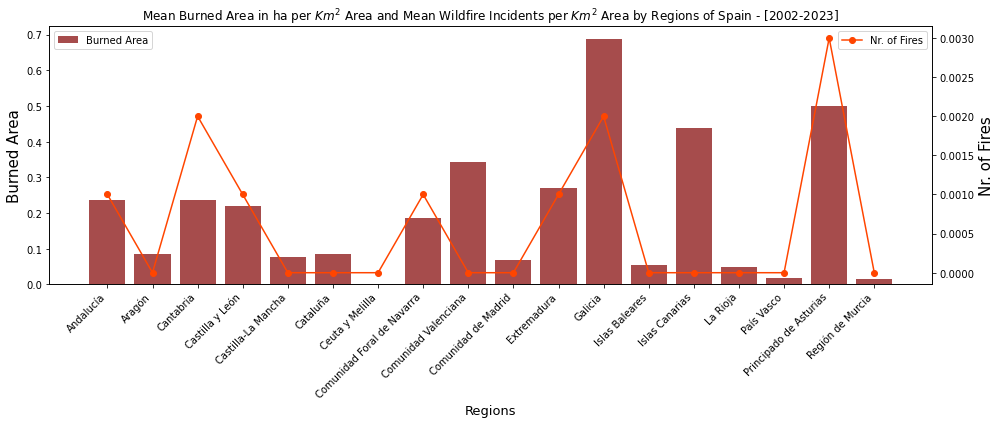

In [29]:
# Set up the plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot the bar chart
ax1.bar(spain_avgburnedarea_avgfires_byregion_02_23['Region'], spain_avgburnedarea_avgfires_byregion_02_23['Burned Area'], color='maroon', alpha=0.7, label='Burned Area')
ax1.set_xlabel('Regions',fontsize=13)
ax1.set_ylabel('Burned Area',fontsize=15)
ax1.set_xticklabels(spain_avgburnedarea_avgfires_byregion_02_23['Region'], rotation=45, ha='right')

# Create a second y-axis to plot the line chart
ax2 = ax1.twinx()
ax2.plot(spain_avgburnedarea_avgfires_byregion_02_23['Region'], spain_avgburnedarea_avgfires_byregion_02_23['Nr. of Fires'], color='orangered', marker='o', label='Nr. of Fires')
ax2.set_ylabel('Nr. of Fires',fontsize=15)

# Add title and legend
plt.title('Mean Burned Area in ha per $Km^{2}$ Area and Mean Wildfire Incidents per $Km^{2}$ Area by Regions of Spain - [2002-2023]')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

by burned area galicia is most critical region when we consider burnt area due to wildfires happened in spain between 2002-2023.
Source:https://gwis.jrc.ec.europa.eu/apps/country.profile/downloads

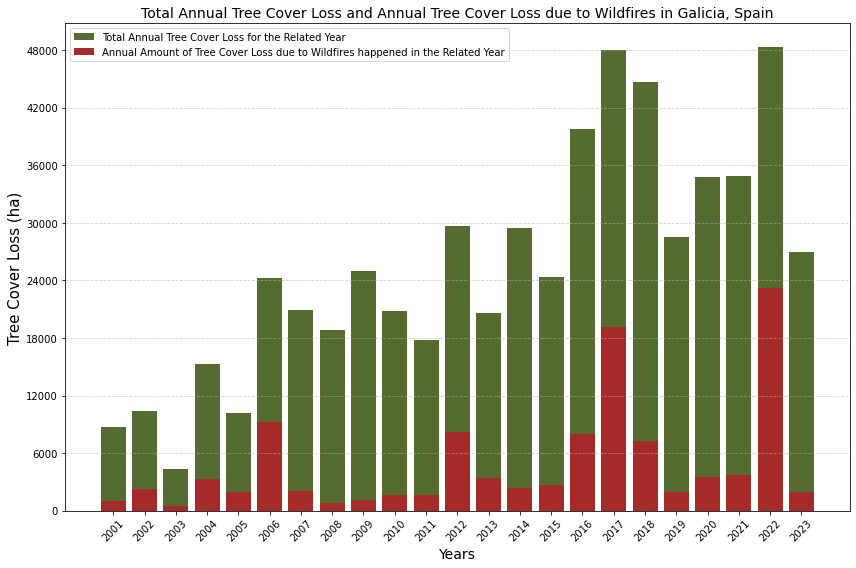

In [30]:
# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the total loss bars
ax.bar(spain_yearly_treecoverloss_byfires_01_23['umd_tree_cover_loss__year'], spain_yearly_treecoverloss_byfires_01_23['umd_tree_cover_loss__ha'], label='Total Annual Tree Cover Loss for the Related Year', color='darkolivegreen')

# Plotting the loss from fires as an overlay, using the same base x-coordinates
ax.bar(spain_yearly_treecoverloss_byfires_01_23['umd_tree_cover_loss__year'], spain_yearly_treecoverloss_byfires_01_23['umd_tree_cover_loss_from_fires__ha'], label='Annual Amount of Tree Cover Loss due to Wildfires happened in the Related Year', color='brown')

# Adding labels, title, and gridlines
ax.set_xlabel('Years', fontsize=14)
ax.set_ylabel('Tree Cover Loss (ha)', fontsize=15)
ax.set_title('Total Annual Tree Cover Loss and Annual Tree Cover Loss due to Wildfires in Galicia, Spain', fontsize=14)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)  # Adding horizontal gridlines

# Adjusting the x-axis ticks
ax.set_xticks(spain_yearly_treecoverloss_byfires_01_23['umd_tree_cover_loss__year'])
ax.set_xticklabels(spain_yearly_treecoverloss_byfires_01_23['umd_tree_cover_loss__year'], rotation=45)

# Increasing the number of y-axis ticks
ax.yaxis.set_major_locator(plt.MaxNLocator(10))  # 10 tick marks on the y-axis

# Display the plot
plt.tight_layout()
plt.show()

Total amount of Tree cover loss and  inside of it the amount of tree cover loss due to wildfires are represented like this.
Source: https://www.globalforestwatch.org/dashboards/global/

In [31]:
firealerts_subregions = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\firealerts_subregion_galicia.csv")
treecover_subregions = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\treecover_subregion_galicia.csv")

In [32]:
firealerts_subregions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   subregion     1012 non-null   int64
 1   alert__count  1012 non-null   int64
dtypes: int64(2)
memory usage: 15.9 KB


In [33]:
treecover_subregions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subregion  4 non-null      int64  
 1   area__ha   4 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 192.0 bytes


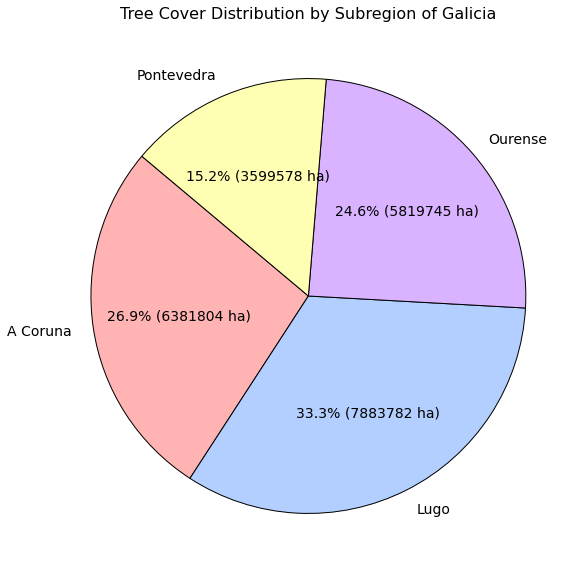

In [87]:
# Map of subregion numbers to names
subregion_map = {1: 'A Coruna', 2: 'Lugo', 3: 'Ourense', 4: 'Pontevedra'}

# Aggregate the tree cover by subregion
treecover_agg = treecover_subregions.groupby('subregion')['area__ha'].sum()

# Replace subregion numbers with names
treecover_agg.index = treecover_agg.index.map(subregion_map)

# Function to format labels with percentage and area
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        absolute = round(pct / 100 * total)
        return f'{pct:.1f}% ({absolute} ha)'
    return my_format

# Setting the pastel colors for each subregion
colors = ['#FFB3B3',  # Pastel light red for A Coruna
          '#B3CFFF',  # Pastel light blue for Lugo
          '#D9B3FF',  # Pastel light purple for Ourense
          '#FFFFB3']  # Pastel yellow for Pontevedra

# Create a pie chart with specified colors
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(treecover_agg, labels=treecover_agg.index, autopct=autopct_format(treecover_agg),
       startangle=140, colors=colors, textprops={'fontsize': 14}, wedgeprops={'edgecolor': 'black'})
ax.set_title('Tree Cover Distribution by Subregion of Galicia', fontsize=16)
plt.show()

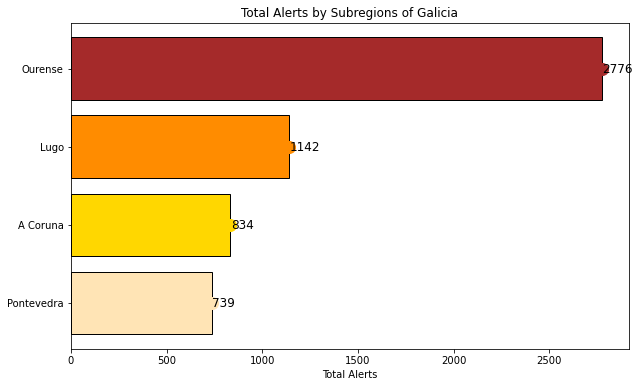

In [88]:
# Aggregate the alert counts by subregion
firealerts_agg = firealerts_subregions.groupby('subregion')['alert__count'].sum()

# Replace subregion numbers with names
firealerts_agg.index = firealerts_agg.index.map(subregion_map)

# Sorting the data by alert count
firealerts_agg = firealerts_agg.sort_values(ascending=False)

# Creating a color map for each subregion
colors = ['#A52A2A', '#FF8C00', '#FFD700', '#FFE4B5']
color_map = dict(zip(firealerts_agg.index, colors))

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(firealerts_agg.index, firealerts_agg, color=[color_map[subregion] for subregion in firealerts_agg.index], edgecolor='black')

# Adding dots at the end of bars
for bar in bars:
    ax.plot(bar.get_width(), bar.get_y() + bar.get_height() / 2, 'o', color=bar.get_facecolor(), markersize=12)

# Adding alert counts at the end of the bars
for bar in bars:
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
            f'{int(bar.get_width())}', va='center', fontsize=12)

# Adjusting the plot
ax.set_xlabel('Total Alerts')
ax.set_title('Total Alerts by Subregions of Galicia')
ax.invert_yaxis()  # Reverse the y-axis to show the highest value at the top
plt.show()

In [36]:
# Filter the data based on the criteria
filtered = galicia_burned_area_byfires_03_18[(galicia_burned_area_byfires_03_18['longitude'] < -6.73) &
                             (galicia_burned_area_byfires_03_18['longitude'] > -9.3) &
                             (galicia_burned_area_byfires_03_18['latitude'] > 41.8) &
                             (galicia_burned_area_byfires_03_18['latitude'] < 43.8) &
                             (galicia_burned_area_byfires_03_18['burnt_area'] > 100)]

# Create a map centered around Galicia
map_galicia = folium.Map(location=[42.7, -8.015], zoom_start=8)
folium.TileLayer('cartodbdark_matter').add_to(map_galicia)

# Add title using custom HTML
title_html = '''
     <h3 align="center" style="font-size:20px"><b>Historical Wildfires Happened in Galicia Which Burned More Than 100 ha Area</b></h3>
     '''
map_galicia.get_root().html.add_child(folium.Element(title_html))

# Define the color mapping for each 'idprovincia'
color_map = {
    15: 'red',      # A Coruña
    27: 'blue',     # Lugo
    32: 'purple',   # Ourense
    36: 'yellow'    # Pontevedra
}

# Add circles for wildfire incidents
for idx, row in filtered.iterrows():
    color = color_map.get(row['idprovincia'], 'blue')  # Use 'blue' as default if idprovincia is not in color_map
    tooltip_text = f"Date & Time: {row['deteccion']}<br>Burnt Area: {row['burnt_area']} ha"
    
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=row['burnt_area'] * 1,  # Adjust the multiplier for better visibility
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.5,
        tooltip=tooltip_text
    ).add_to(map_galicia)

# Add custom legend
legend_html = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: 130px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: white; opacity: 0.9;
     ">
     <b>Subregions of Galica</b>
     <br>
     <i style="background: red; width: 18px; height: 18px; float: left; margin-right: 8px;"></i>A Coruña
     <br>
     <i style="background: blue; width: 18px; height: 18px; float: left; margin-right: 8px;"></i>Lugo
     <br>
     <i style="background: purple; width: 18px; height: 18px; float: left; margin-right: 8px;"></i>Ourense
     <br>
     <i style="background: yellow; width: 18px; height: 18px; float: left; margin-right: 8px;"></i>Pontevedra
     </div>
     '''
map_galicia.get_root().html.add_child(folium.Element(legend_html))

# Display the map
map_galicia


In [37]:
# Create a map centered on Galicia
heatmap_galicia = folium.Map(location=[42.7, -8.015], zoom_start=8)

# Prepare data for heatmap, normalize FRP by dividing by its maximum value
lat_longs = [[row['latitude'], row['longitude'], row['frp'] / filtered_galicia_fires_00_22['frp'].max()] 
             for _, row in filtered_galicia_fires_00_22.iterrows()]

# Add HeatMap to the folium map
HeatMap(
    lat_longs, 
    radius=2.1,      # Adjust radius for heatmap circles
    blur=2.5,        # Adjust blur for smoother heatmap
    max_zoom=10000,     # Adjust for better visualization
    min_opacity=0.80 # Adjust for a clearer distinction
).add_to(heatmap_galicia)

# Add title using custom HTML
title_html = '''
     <h3 align="center" style="font-size:20px"><b>Galician Zones Wildfire Severity Heatmap by Considering the Fire Radiative Power (FRP) in Megawatts of Historical Wildfire Incidents 2001-2022 </b></h3>
     '''
heatmap_galicia.get_root().html.add_child(folium.Element(title_html))

# Add custom legend for the color bar
color_bar_html = '''
     <div style="position: fixed;
     bottom: 50px; left: 50px; width: 120px; height: 150px;
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white; opacity: 0.85;">
     <b>FRP Range</b><br>
     <i style="background: #00FF00; width: 20px; height: 20px; float: left; margin-right: 5px;"></i>Low<br>
     <i style="background: #FFFF00; width: 20px; height: 20px; float: left; margin-right: 5px;"></i>Medium<br>
     <i style="background: #FF0000; width: 20px; height: 20px; float: left; margin-right: 5px;"></i>High<br>
     </div>
     '''
heatmap_galicia.get_root().html.add_child(folium.Element(color_bar_html))

# Display the map
heatmap_galicia

In [38]:
# Aggregate burnt_area by month
monthly_burnt_area = galicia_total_pollutant.groupby('month')['CO2'].sum().reset_index()

# Create month names list
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Map month numbers to names
monthly_burnt_area['month_name'] = monthly_burnt_area['month'].apply(lambda x: month_names[x-1])

# Map months to angles in the radial plot
angle_mapping = {1: 0, 2: 30, 3: 60, 4: 90, 5: 120, 6: 150, 7: 180, 8: 210, 9: 240, 10: 270, 11: 300, 12: 330}
monthly_burnt_area['theta'] = monthly_burnt_area['month'].map(angle_mapping)

# Create radial polar plot
fig = go.Figure()

fig.add_trace(go.Barpolar(
    r=monthly_burnt_area['CO2'],
    theta=monthly_burnt_area['theta'],  # Use the corrected angles
    marker_color=[px.colors.sequential.Reds[i % len(px.colors.sequential.Reds)] for i in range(len(monthly_burnt_area))],
    marker_line_color='black',
    marker_line_width=1,
    opacity=0.8
))

# Layout adjustments
fig.update_layout(
    title={
        'text': 'Monthly Distribution of Total Emitted CO<sub>2</sub> Greenhouse Gas in Metric Tons (tonnes) of Wildfires in Galicia 2002-2023, per kilogram of dry matter burned',
        'font': {
            'size': 12  # Adjust the font size here
        }
    },
    polar=dict(
        radialaxis=dict(visible=True, range=[0, monthly_burnt_area['CO2'].max() + 5]),
        angularaxis=dict(
            tickmode='array',
            tickvals=list(angle_mapping.values()),
            ticktext=month_names
        )
    ),
    template="plotly_dark"
)

fig.show()

In [39]:
# Pivot the data
pivoted_data = pd.pivot_table(galicia_total_pollutant, index='month', values=['CO', 'TPM', 'PM25', 'TPC', 'NMHC', 'OC', 'CH4', 'SO2', 'BC', 'NOx'], aggfunc='sum')

# Create traces for each pollutant
pollutant_traces = []
pollutants = pivoted_data.columns
colors = px.colors.qualitative.Pastel  # Choose pastel colors for the bars

# Add CO separately
co_trace = go.Bar(
    y=[month - 0.2 for month in pivoted_data.index],  # Adjusted position
    x=pivoted_data['CO'],
    name='CO',
    orientation='h',
    marker=dict(color='orange'),
    hoverinfo='x+y+name',
    width=0.4  # Adjust bar width
)
pollutant_traces.append(co_trace)

# Add other pollutants, excluding CO
stacked_traces = []
for i, pollutant in enumerate([p for p in pollutants if p != 'CO']):
    trace = go.Bar(
        y=[month + 0.2 for month in pivoted_data.index],  # Adjusted position
        x=pivoted_data[pollutant],
        name=pollutant,
        orientation='h',
        marker=dict(color=colors[i % len(colors)]),
        hoverinfo='x+y+name',
        width=0.4  # Adjust bar width
    )
    stacked_traces.append(trace)

# Create tick intervals at every 25k
max_val = pivoted_data.sum().max()
tick_vals = list(range(0, int(max_val + 25000), 25000))

# Create the layout with increased height
layout = go.Layout(
    title='Monthly Emissions by Other Pollutants released by Wildfire Incidents in Galicia between 2002-2023',
    barmode='stack',
    xaxis=dict(
        title='Total Emissions in Metric Tons (tonnes)',
        showgrid=True,
        tickvals=tick_vals,
        ticktext=[f'{val // 1000}k' for val in tick_vals],
        tickfont=dict(size=14)
    ),
    yaxis=dict(
        title='Month',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        tickfont=dict(size=14)
    ),
    legend=dict(
        title=dict(
            text='Pollutants',
            font=dict(size=16)
        ),
        x=1.05,
        y=1,
        font=dict(size=12)
    ),
    template='plotly_white',
    height=800  # Adjust the height here
)

# Create the figure
fig = go.Figure(data=pollutant_traces + stacked_traces, layout=layout)

# Show the interactive plot
fig.show()

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
C:\Users\45502\AppData\Local\Temp\ipykernel_12488\2748548092.py:33: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



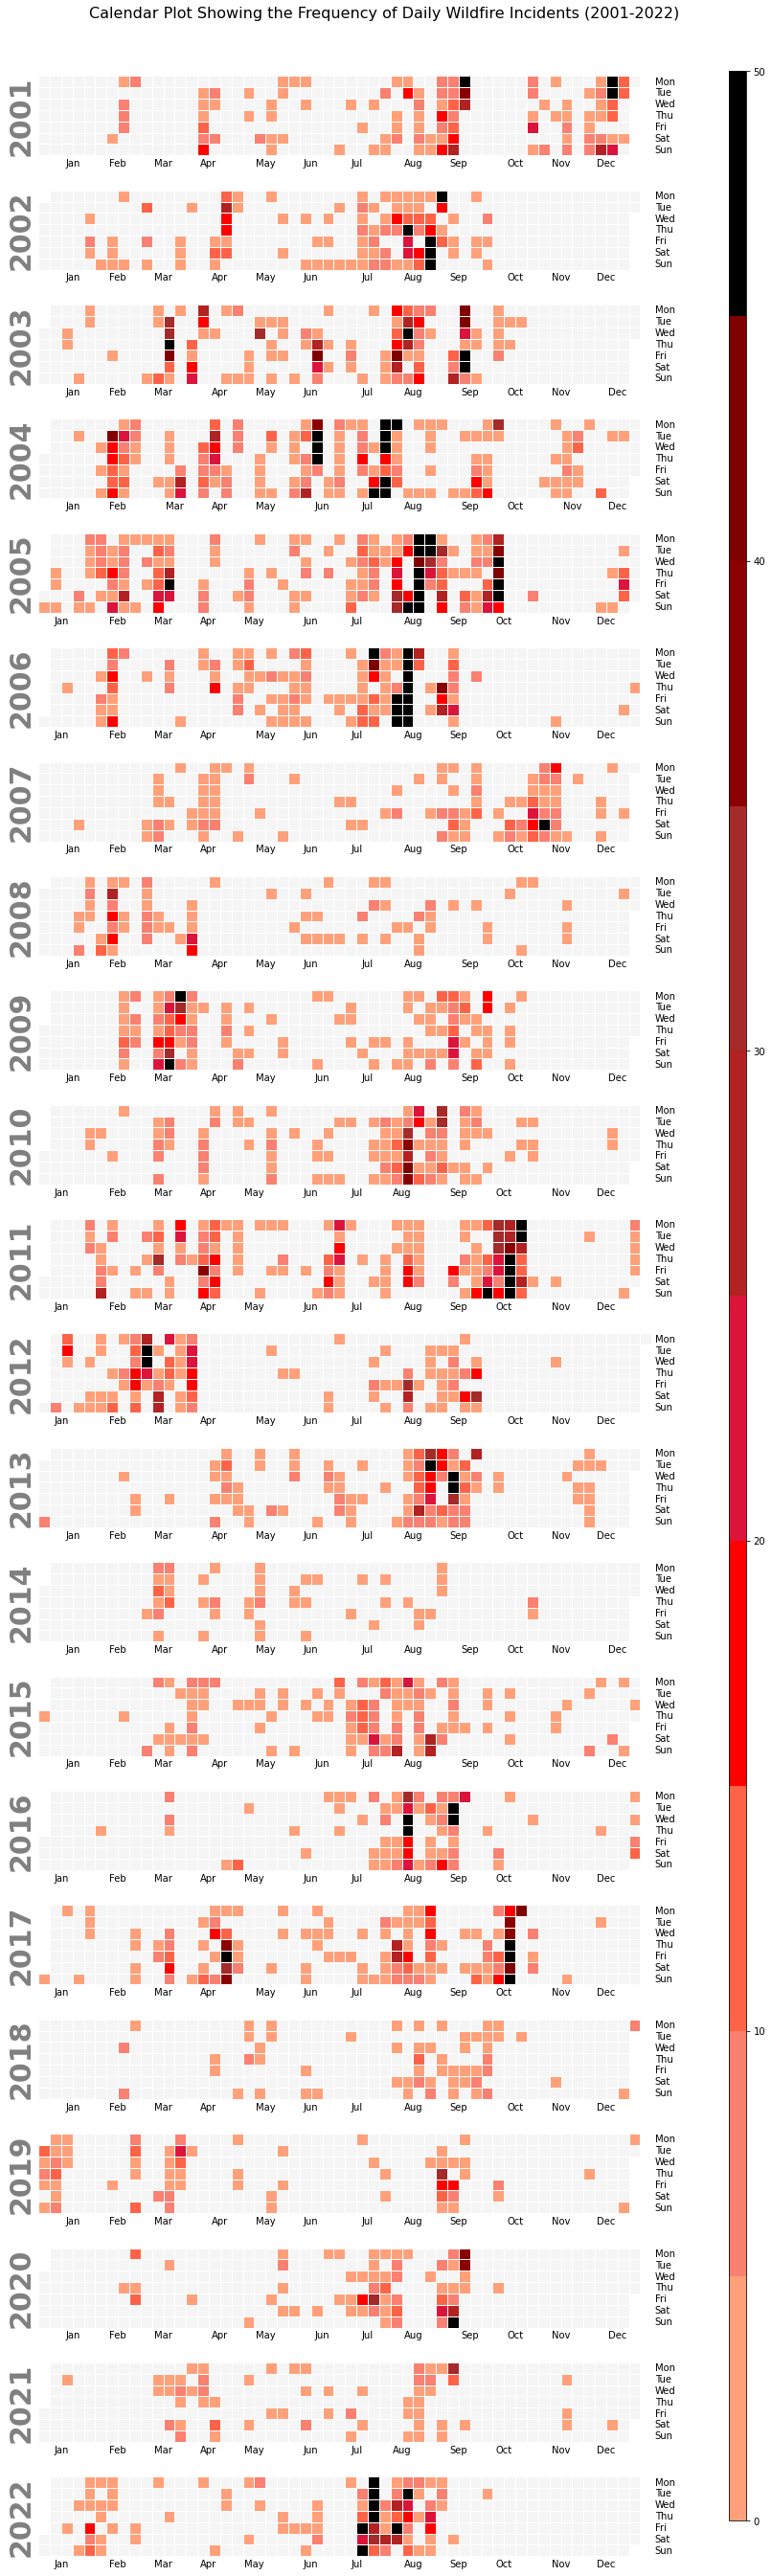

In [40]:
# Convert 'datetime' to a date to group by day
filtered_galicia_fires_00_22['acq_date'] = filtered_galicia_fires_00_22['datetime'].dt.date

# Ensure that 'acq_date' is a proper DateTimeIndex for the grouping to work
filtered_galicia_fires_00_22.set_index('acq_date', inplace=True)

# Group by 'acq_date' and count the number of wildfires
wildfire_count = filtered_galicia_fires_00_22.groupby(filtered_galicia_fires_00_22.index).size()

# Convert the index to a DatetimeIndex
wildfire_count.index = pd.to_datetime(wildfire_count.index)

# Create a custom colormap based on the number of wildfires
cmap_colors = ['lightsalmon','lightsalmon','lightsalmon','lightsalmon','lightsalmon',
               'salmon','salmon','salmon','salmon','salmon',
               'tomato','tomato','tomato','tomato','tomato',
               'red','red','red','red','red',
               'crimson','crimson','crimson','crimson','crimson',
               'firebrick','firebrick','firebrick','firebrick','firebrick',
               'brown','brown','brown','brown','brown',
               'darkred','darkred','darkred','darkred','darkred',
               'maroon','maroon','maroon','maroon','maroon',
               'black','black','black','black','black',]
custom_cmap = ListedColormap(cmap_colors)

# Plot the calendar plot
calplot.calplot(wildfire_count, cmap=custom_cmap, vmin=0, vmax=len(cmap_colors), edgecolor='white', linewidth=0.5)

# Add title with y offset
plt.suptitle('Calendar Plot Showing the Frequency of Daily Wildfire Incidents (2001-2022)', fontsize=16,x=0.45, y=1.0)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.80, 0.99])

# Show plot
plt.show()


In [41]:
# Ensure that the common columns are in the same dtype
common_columns = ['year', 'season', 'month', 'week', 'day_of_week', 'hour','day_of_month', 'day_of_year']

# Convert the data types for the common columns to match between both datasets
frp_firedata01_22 = frp_firedata01_22.astype({col: 'int64' for col in common_columns})
galicia_weather = galicia_weather.astype({col: 'int64' for col in common_columns})

# Perform the merge
merged_hourly_weather_frp_data = pd.merge(
    frp_firedata01_22, 
    galicia_weather, 
    on=common_columns, 
    how='left'  # This will include all rows from firedata and fill missing values from galicia_weather
)

# Display the first few rows of the merged data
merged_hourly_weather_frp_data.head()


latitude  longitude   acq_date  acq_time  confidence   frp  \
0   42.5118    -8.4374 2001-02-17  11:54:00          36   5.6   
1   42.2953    -8.2946 2001-02-19  11:42:00          60   8.7   
2   42.2688    -8.2864 2001-02-19  22:48:00          83  16.2   
3   42.2428    -6.8630 2001-02-21  11:30:00          71  15.2   
4   42.2881    -8.3451 2001-02-21  11:30:00          77  20.2   

             datetime  year  season  month  ...  \
0 2001-02-17 11:54:00  2001       1      2  ...   
1 2001-02-19 11:42:00  2001       1      2  ...   
2 2001-02-19 22:48:00  2001       1      2  ...   
3 2001-02-21 11:30:00  2001       1      2  ...   
4 2001-02-21 11:30:00  2001       1      2  ...   

   soil_moisture_7_to_28cm (m³/m³)  soil_moisture_28_to_100cm (m³/m³)  \
0                            0.379                              0.399   
1                            0.370                              0.392   
2                            0.367                              0.391   
3                            0.363                              0.387   
4                            0.363                              0.387   

   soil_moisture_100_to_255cm (m³/m³)  is_day ()  sunshine_duration (s)  \
0                               0.422          1                 3600.0   
1                               0.421          1                 3600.0   
2                               0.420          0                    0.0   
3                               0.419          1                 3600.0   
4                               0.419          1                 3600.0   

  shortwave_radiation_instant (W/m²)  direct_radiation_instant (W/m²)  \
0                              169.4                             89.9   
1                              224.7                            160.9   
2                                0.0                              0.0   
3                              232.8                            165.7   
4                              232.8                            165.7   

   diffuse_radiation_instant (W/m²)  direct_normal_irradiance_instant (W/m²)  \
0                              79.5                                    349.9   
1                              63.8                                    604.1   
2                               0.0                                      0.0   
3                              67.1                                    600.0   
4                              67.1                                    600.0   

   terrestrial_radiation_instant (W/m²)  
0                                 359.8  
1                                 372.9  
2                                   0.0  
3                                 386.2  
4                                 386.2  

[5 rows x 42 columns]

In [42]:
merged_hourly_weather_frp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22277 entries, 0 to 22276
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   latitude                                 22277 non-null  float64       
 1   longitude                                22277 non-null  float64       
 2   acq_date                                 22277 non-null  datetime64[ns]
 3   acq_time                                 22277 non-null  object        
 4   confidence                               22277 non-null  int64         
 5   frp                                      22277 non-null  float64       
 6   datetime                                 22277 non-null  datetime64[ns]
 7   year                                     22277 non-null  int64         
 8   season                                   22277 non-null  int64         
 9   month                                  

In [43]:
# Further filter the data to keep only rows where confidence_category is 'h'
high_confidence_merged_hourly_weather_frp_data = merged_hourly_weather_frp_data[merged_hourly_weather_frp_data['confidence'] > 90]


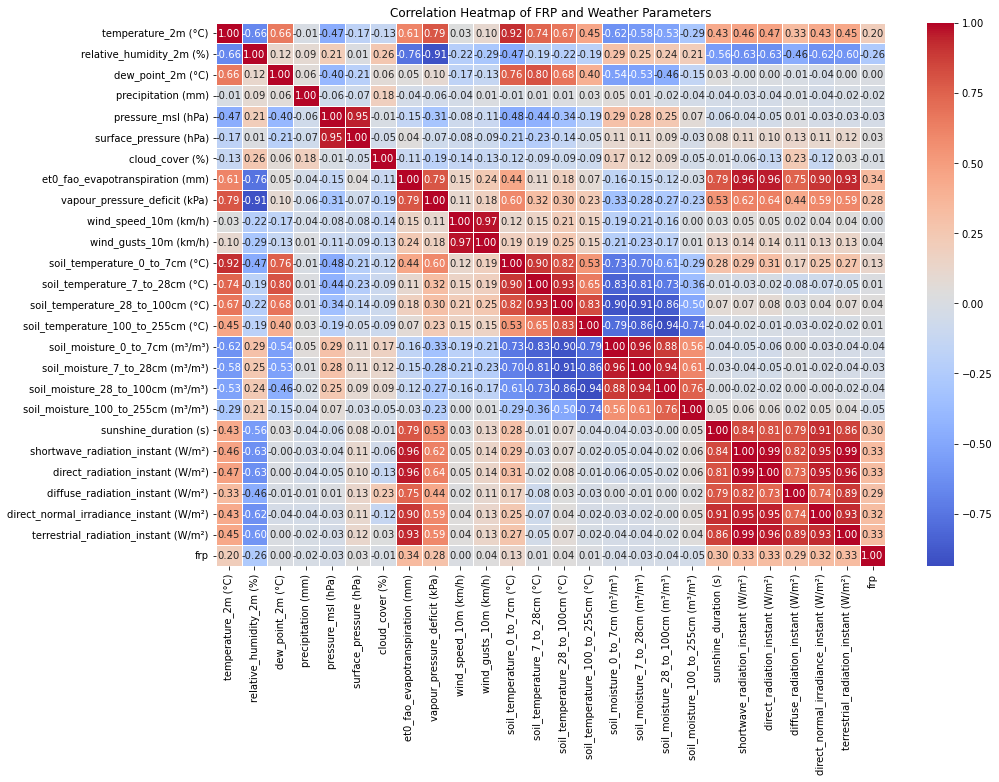

In [44]:
# Selecting the columns for correlation analysis
columns_of_interest = [
    'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)', 
    'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)', 
    'et0_fao_evapotranspiration (mm)', 'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)', 
    'wind_gusts_10m (km/h)', 'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)', 
    'soil_temperature_28_to_100cm (°C)', 'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)', 
    'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)', 'soil_moisture_100_to_255cm (m³/m³)', 
    'sunshine_duration (s)', 'shortwave_radiation_instant (W/m²)', 'direct_radiation_instant (W/m²)', 
    'diffuse_radiation_instant (W/m²)', 'direct_normal_irradiance_instant (W/m²)', 'terrestrial_radiation_instant (W/m²)',
    'frp'
]

# Compute the correlation matrix
corr_matrix = high_confidence_merged_hourly_weather_frp_data[columns_of_interest].corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create the heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Set plot title
plt.title('Correlation Heatmap of FRP and Weather Parameters')

# Show the plot
plt.show()

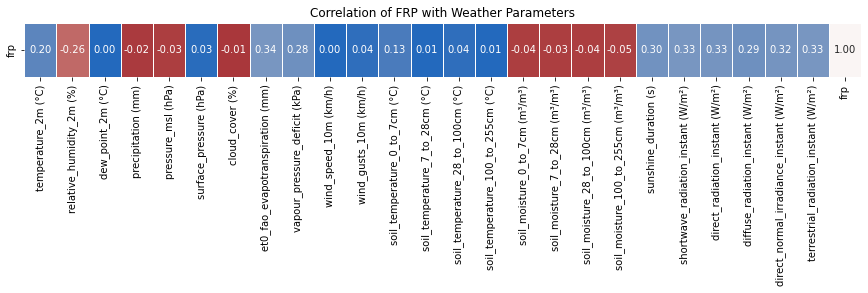

In [45]:
# Create custom diverging colormap
cmap_negative = plt.get_cmap('vlag', 128)
cmap_positive = plt.get_cmap('vlag', 128)

# Combine them into a custom diverging colormap
custom_cmap = ListedColormap(np.vstack((cmap_negative(np.linspace(0.5, 1, 128)), cmap_positive(np.linspace(0, 0.5, 128)))))

# Selecting the columns for correlation analysis
columns_of_interest = [
    'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)', 
    'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)', 
    'et0_fao_evapotranspiration (mm)', 'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)', 
    'wind_gusts_10m (km/h)', 'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)', 
    'soil_temperature_28_to_100cm (°C)', 'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)', 
    'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)', 'soil_moisture_100_to_255cm (m³/m³)', 
    'sunshine_duration (s)', 'shortwave_radiation_instant (W/m²)', 'direct_radiation_instant (W/m²)', 
    'diffuse_radiation_instant (W/m²)', 'direct_normal_irradiance_instant (W/m²)', 'terrestrial_radiation_instant (W/m²)',
    'frp'
]

# Compute the correlation matrix
corr_matrix = high_confidence_merged_hourly_weather_frp_data[columns_of_interest].corr()

# Extract the last row ('alert__count') correlation
alert_corr = corr_matrix.loc['frp']

# Create the heatmap with seaborn
plt.figure(figsize=(15, 1))
sns.heatmap(alert_corr.values.reshape(1, -1), annot=True, cmap=custom_cmap, fmt='.2f', xticklabels=alert_corr.index, yticklabels=['frp'], cbar=False, linewidths=.5, center=0)

# Set plot title
plt.title('Correlation of FRP with Weather Parameters')

# Show the plot
plt.show()

In [46]:
# Grouping firedata by year, day_of_year, and hour to get fire counts
fire_grouped = frp_firedata01_22.groupby(['year', 'day_of_year', 'hour']).size().reset_index(name='fire_count')

# Merging the fire counts with galicia_weather
galicia_weather_firecount_merged = pd.merge(galicia_weather, fire_grouped, on=['year', 'day_of_year', 'hour'], how='left')

# Replace NaN with 0, since NaN indicates no fire incidents at that time
galicia_weather_firecount_merged['fire_count'] = galicia_weather_firecount_merged['fire_count'].fillna(0).astype(int)

# Display the first few rows of the new dataset
galicia_weather_firecount_merged.head()

time  temperature_2m (°C)  relative_humidity_2m (%)  \
0 2000-01-01 00:00:00                  1.9                        83   
1 2000-01-01 01:00:00                  1.3                        85   
2 2000-01-01 02:00:00                 -0.1                        89   
3 2000-01-01 03:00:00                 -1.7                        92   
4 2000-01-01 04:00:00                 -2.2                        92   

   dew_point_2m (°C)  precipitation (mm)  pressure_msl (hPa)  \
0               -0.7                 0.0              1029.0   
1               -0.9                 0.0              1029.2   
2               -1.7                 0.0              1029.3   
3               -2.9                 0.0              1028.8   
4               -3.3                 0.0              1028.7   

   surface_pressure (hPa)  cloud_cover (%)  et0_fao_evapotranspiration (mm)  \
0                   963.6               29                              0.0   
1                   963.6               24                              0.0   
2                   963.4               24                              0.0   
3                   962.6               16                              0.0   
4                   962.4                8                              0.0   

   vapour_pressure_deficit (kPa)  ...  terrestrial_radiation_instant (W/m²)  \
0                           0.12  ...                                   0.0   
1                           0.10  ...                                   0.0   
2                           0.07  ...                                   0.0   
3                           0.05  ...                                   0.0   
4                           0.04  ...                                   0.0   

   year  season  month  week  day_of_week  hour  day_of_month  day_of_year  \
0  2000       1      1    52            6     1             1            1   
1  2000       1      1    52            6     2             1            1   
2  2000       1      1    52            6     3             1            1   
3  2000       1      1    52            6     4             1            1   
4  2000       1      1    52            6     5             1            1   

   fire_count  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 36 columns]

In [47]:
# Filtering out rows with fire_count equal to 0
galicia_weather_nonzero_fire = galicia_weather_firecount_merged[galicia_weather_firecount_merged['fire_count'] != 0]

In [48]:
# Ensure that the common columns are in the same dtype
common_columns = ['year', 'season', 'month', 'week', 'day_of_week', 'hour','day_of_month', 'day_of_year']

# Convert the data types for the common columns to match between both datasets
galicia_burned_area_byfires_03_18 = galicia_burned_area_byfires_03_18.astype({col: 'int64' for col in common_columns})
galicia_weather = galicia_weather.astype({col: 'int64' for col in common_columns})

# Perform the merge
merged_weather_burntarea_data = pd.merge(
    galicia_burned_area_byfires_03_18, 
    galicia_weather, 
    on=common_columns, 
    how='left'  # This will include all rows from firedata and fill missing values from galicia_weather
)

# Display the first few rows of the merged data
merged_weather_burntarea_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 72757 entries, 0 to 72756
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   deteccion                                72757 non-null  datetime64[ns]
 1   idprovincia                              72757 non-null  int64         
 2   burnt_area                               72757 non-null  float64       
 3   latitude                                 72575 non-null  float64       
 4   longitude                                72575 non-null  float64       
 5   year                                     72757 non-null  int64         
 6   season                                   72757 non-null  int64         
 7   month                                    72757 non-null  int64         
 8   week                                     72757 non-null  int64         
 9   day_of_week                            

In [49]:
# Extract the week number and year to group by
galicia_weather['year_week'] = galicia_weather['time'].dt.strftime('%Y-%U')

# Aggregating data to weekly, taking the mean for each week
weekly_weather_data = galicia_weather.groupby('year_week').mean().reset_index()

# Split the 'year_week' column into separate 'year' and 'week' columns
weekly_weather_data[['year', 'week']] = weekly_weather_data['year_week'].str.split('-', expand=True).astype(int)

# Drop the 'year_week' column
weekly_weather_data.drop(columns=['year_week'], inplace=True)

# Display the first few rows of the weekly aggregated data
weekly_weather_data.head()

temperature_2m (°C)  relative_humidity_2m (%)  dew_point_2m (°C)  \
0             1.945833                 81.166667          -1.100000   
1             5.446429                 84.023810           2.852381   
2             2.594048                 85.452381           0.247619   
3             2.028571                 84.505952          -0.460714   
4             2.569048                 83.976190          -0.035119   

   precipitation (mm)  pressure_msl (hPa)  surface_pressure (hPa)  \
0            0.000000         1028.962500              963.566667   
1            0.016071         1025.641071              961.237500   
2            0.183929         1024.692857              959.710714   
3            0.000000         1027.607738              962.308929   
4            0.002976         1024.231548              959.273810   

   cloud_cover (%)  et0_fao_evapotranspiration (mm)  \
0         7.166667                         0.034167   
1        55.160714                         0.034643   
2        42.285714                         0.029524   
3        13.339286                         0.041310   
4        41.148810                         0.038929   

   vapour_pressure_deficit (kPa)  wind_speed_10m (km/h)  ...  \
0                       0.157500               4.691667  ...   
1                       0.162976               8.160119  ...   
2                       0.118274              12.727381  ...   
3                       0.131071              10.794048  ...   
4                       0.135893               9.242857  ...   

   direct_normal_irradiance_instant (W/m²)  \
0                               231.166667   
1                               140.266667   
2                               156.902976   
3                               255.066667   
4                               181.782738   

   terrestrial_radiation_instant (W/m²)  year  season  month  week  \
0                            139.258333  2000     1.0    1.0     0   
1                            142.637500  2000     1.0    1.0     1   
2                            150.438690  2000     1.0    1.0     2   
3                            160.467857  2000     1.0    1.0     3   
4                            173.112500  2000     1.0    1.0     4   

   day_of_week  hour  day_of_month  day_of_year  
0          6.0  12.5           1.0          1.0  
1          4.0  12.5           5.0          5.0  
2          4.0  12.5          12.0         12.0  
3          4.0  12.5          19.0         19.0  
4          4.0  12.5          26.0         26.0  

[5 rows x 34 columns]

In [50]:
# Extract the ISO calendar year and week to group by
galicia_weather['year'] = galicia_weather['time'].dt.isocalendar().year
galicia_weather['week'] = galicia_weather['time'].dt.isocalendar().week

# Grouping by the ISO calendar year and week and taking the mean for each week
weekly_weather_data = galicia_weather.groupby(['year', 'week']).mean().reset_index()

# Display the first few rows of the weekly aggregated data
weekly_weather_data.head()

year  week  temperature_2m (°C)  relative_humidity_2m (%)  \
0  1999    52             2.252083                 82.395833   
1  2000     1             5.850595                 84.660714   
2  2000     2             2.138690                 84.767857   
3  2000     3             2.170238                 84.922619   
4  2000     4             3.189286                 84.494048   

   dew_point_2m (°C)  precipitation (mm)  pressure_msl (hPa)  \
0          -0.608333            0.000000         1028.852083   
1           3.364881            0.029167         1025.888095   
2          -0.310119            0.170833         1023.983929   
3          -0.255357            0.000000         1027.510119   
4           0.655952            0.002976         1025.488690   

   surface_pressure (hPa)  cloud_cover (%)  et0_fao_evapotranspiration (mm)  \
0              963.527083         8.145833                         0.034375   
1              961.562500        63.571429                         0.033929   
2              958.941667        33.559524                         0.030952   
3              962.251786        16.196429                         0.040952   
4              960.589286        44.785714                         0.041012   

   ...  direct_radiation_instant (W/m²)  diffuse_radiation_instant (W/m²)  \
0  ...                        70.202083                         21.145833   
1  ...                        40.952976                         26.702976   
2  ...                        57.545238                         21.491071   
3  ...                        83.503571                         24.485119   
4  ...                        66.744048                         30.870238   

   direct_normal_irradiance_instant (W/m²)  \
0                               225.227083   
1                               125.539881   
2                               176.457738   
3                               247.979762   
4                               183.569643   

   terrestrial_radiation_instant (W/m²)  season  month  day_of_week  hour  \
0                            139.622917     1.0    1.0          6.5  12.5   
1                            143.596429     1.0    1.0          4.0  12.5   
2                            151.745238     1.0    1.0          4.0  12.5   
3                            162.075595     1.0    1.0          4.0  12.5   
4                            175.187500     1.0    1.0          4.0  12.5   

   day_of_month  day_of_year  
0           1.5          1.5  
1           6.0          6.0  
2          13.0         13.0  
3          20.0         20.0  
4          27.0         27.0  

[5 rows x 34 columns]

In [51]:
weekly_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     1271 non-null   UInt32 
 1   week                                     1271 non-null   UInt32 
 2   temperature_2m (°C)                      1271 non-null   float64
 3   relative_humidity_2m (%)                 1271 non-null   float64
 4   dew_point_2m (°C)                        1271 non-null   float64
 5   precipitation (mm)                       1271 non-null   float64
 6   pressure_msl (hPa)                       1271 non-null   float64
 7   surface_pressure (hPa)                   1271 non-null   float64
 8   cloud_cover (%)                          1271 non-null   float64
 9   et0_fao_evapotranspiration (mm)          1271 non-null   float64
 10  vapour_pressure_deficit (kPa)            1271 no

In [52]:
print(weekly_weather_data['week'].unique())

<IntegerArray>
[52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53]
Length: 53, dtype: UInt32


In [53]:
weekly_fire_alerts = pd.read_csv(r"C:\Users\45502\Desktop\galicia\githubnael\social-data-final.github.io\data\Regions with the most fire Alerts in Galicia, Spain\modis_fire_alerts__count.csv")
weekly_fire_alerts.head(5)

subregion  year  week  alert__count confidence_category
0          2  2016    32             4                   h
1          3  2018    24             1                   n
2          3  2023    34             1                   n
3          3  2012     2             2                   n
4          4  2017    31             1                   h

In [54]:
weekly_fire_alerts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subregion            1012 non-null   int64 
 1   year                 1012 non-null   int64 
 2   week                 1012 non-null   int64 
 3   alert__count         1012 non-null   int64 
 4   confidence_category  1012 non-null   object
dtypes: int64(4), object(1)
memory usage: 39.7+ KB


In [55]:
# Merge the two datasets on 'year' and 'week' columns
merged_weekly_firealert_weather_data = pd.merge(weekly_weather_data, weekly_fire_alerts, on=['year', 'week'], how='left')

In [56]:
# Filter the rows where alert__count is not NaN and greater than zero
filtered_weekly_datav1 = merged_weekly_firealert_weather_data[merged_weekly_firealert_weather_data['alert__count'].notna()
                                                              & (merged_weekly_firealert_weather_data['alert__count'] > 0)]

In [57]:
# Further filter the data to keep only rows where confidence_category is 'h'
filtered_weekly_datav2 = filtered_weekly_datav1[filtered_weekly_datav1['confidence_category'] == 'h']

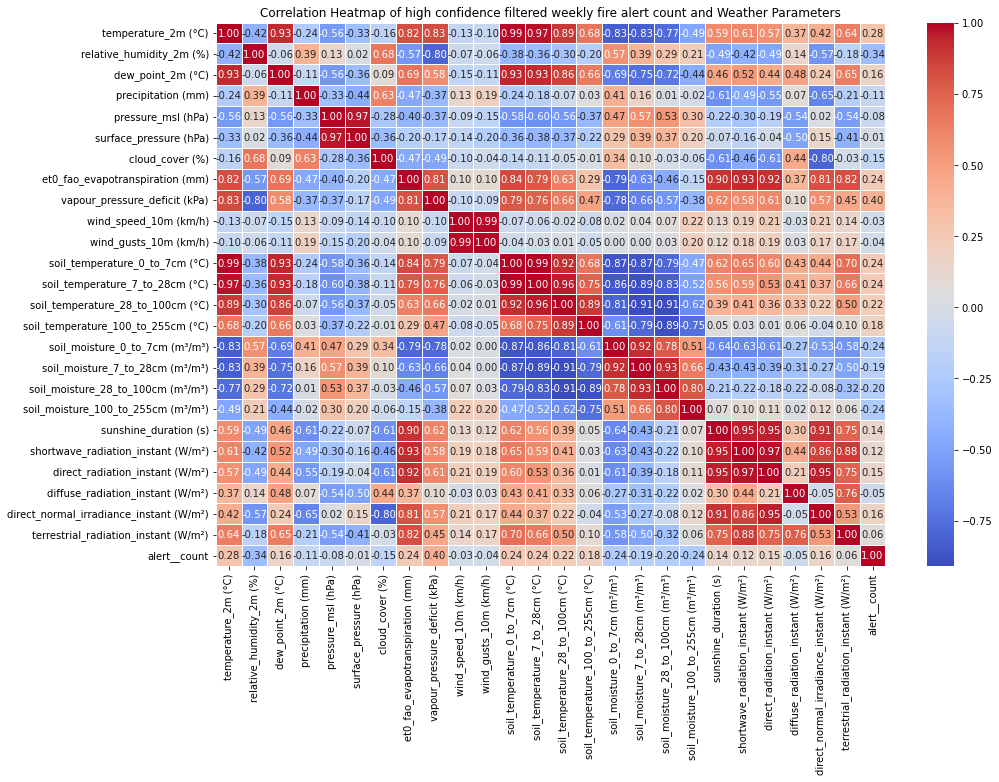

In [58]:
# Selecting the columns for correlation analysis
columns_of_interest = [
    'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)', 
    'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)', 
    'et0_fao_evapotranspiration (mm)', 'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)', 
    'wind_gusts_10m (km/h)', 'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)', 
    'soil_temperature_28_to_100cm (°C)', 'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)', 
    'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)', 'soil_moisture_100_to_255cm (m³/m³)', 
    'sunshine_duration (s)', 'shortwave_radiation_instant (W/m²)', 'direct_radiation_instant (W/m²)', 
    'diffuse_radiation_instant (W/m²)', 'direct_normal_irradiance_instant (W/m²)', 'terrestrial_radiation_instant (W/m²)'
    ,'alert__count'
]

# Compute the correlation matrix
corr_matrix = filtered_weekly_datav2[columns_of_interest].corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create the heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Set plot title
plt.title('Correlation Heatmap of high confidence filtered weekly fire alert count and Weather Parameters')

# Show the plot
plt.show()

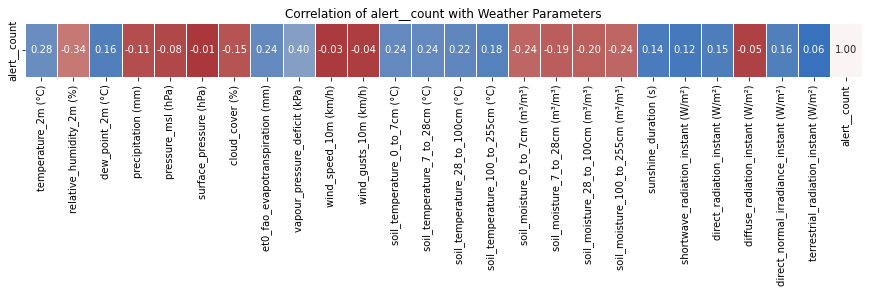

In [59]:
# Create custom diverging colormap
cmap_negative = plt.get_cmap('vlag', 128)
cmap_positive = plt.get_cmap('vlag', 128)

# Combine them into a custom diverging colormap
custom_cmap = ListedColormap(np.vstack((cmap_negative(np.linspace(0.5, 1, 128)), cmap_positive(np.linspace(0, 0.5, 128)))))

# Selecting the columns for correlation analysis
columns_of_interest = [
    'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)', 
    'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)', 
    'et0_fao_evapotranspiration (mm)', 'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)', 
    'wind_gusts_10m (km/h)', 'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)', 
    'soil_temperature_28_to_100cm (°C)', 'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)', 
    'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)', 'soil_moisture_100_to_255cm (m³/m³)', 
    'sunshine_duration (s)', 'shortwave_radiation_instant (W/m²)', 'direct_radiation_instant (W/m²)', 
    'diffuse_radiation_instant (W/m²)', 'direct_normal_irradiance_instant (W/m²)', 'terrestrial_radiation_instant (W/m²)',
    'alert__count'
]

# Compute the correlation matrix
corr_matrix = filtered_weekly_datav2[columns_of_interest].corr()

# Extract the last row ('alert__count') correlation
alert_corr = corr_matrix.loc['alert__count']

# Create the heatmap with seaborn
plt.figure(figsize=(15, 1))
sns.heatmap(alert_corr.values.reshape(1, -1), annot=True, cmap=custom_cmap, fmt='.2f', xticklabels=alert_corr.index, yticklabels=['alert__count'], cbar=False, linewidths=.5, center=0)

# Set plot title
plt.title('Correlation of alert__count with Weather Parameters')

# Show the plot
plt.show()

In [60]:
filtered_weekly_datav2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 633 to 1974
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     197 non-null    UInt32 
 1   week                                     197 non-null    UInt32 
 2   temperature_2m (°C)                      197 non-null    float64
 3   relative_humidity_2m (%)                 197 non-null    float64
 4   dew_point_2m (°C)                        197 non-null    float64
 5   precipitation (mm)                       197 non-null    float64
 6   pressure_msl (hPa)                       197 non-null    float64
 7   surface_pressure (hPa)                   197 non-null    float64
 8   cloud_cover (%)                          197 non-null    float64
 9   et0_fao_evapotranspiration (mm)          197 non-null    float64
 10  vapour_pressure_deficit (kPa)            197 no

In [61]:
filtered_weekly_datav2.head(5)

year  week  temperature_2m (°C)  relative_humidity_2m (%)  \
633  2012     4             4.857738                 86.434524   
645  2012     8             6.883333                 78.547619   
651  2012     9             8.844048                 83.238095   
656  2012     9             8.844048                 83.238095   
657  2012     9             8.844048                 83.238095   

     dew_point_2m (°C)  precipitation (mm)  pressure_msl (hPa)  \
633           2.619048            0.014881         1025.511310   
645           2.991667            0.000000         1027.979762   
651           5.794048            0.026190         1024.092857   
656           5.794048            0.026190         1024.092857   
657           5.794048            0.026190         1024.092857   

     surface_pressure (hPa)  cloud_cover (%)  et0_fao_evapotranspiration (mm)  \
633              960.983929        36.309524                         0.041131   
645              963.739286        23.523810                         0.081726   
651              960.533333        48.523810                         0.076607   
656              960.533333        48.523810                         0.076607   
657              960.533333        48.523810                         0.076607   

     ...  terrestrial_radiation_instant (W/m²)    season     month  \
633  ...                            173.393452  1.000000  1.000000   
645  ...                            244.268452  1.000000  2.000000   
651  ...                            265.011310  1.571429  2.571429   
656  ...                            265.011310  1.571429  2.571429   
657  ...                            265.011310  1.571429  2.571429   

     day_of_week  hour  day_of_month  day_of_year  subregion  alert__count  \
633          4.0  12.5     26.000000         26.0        4.0           2.0   
645          4.0  12.5     23.000000         54.0        3.0           2.0   
651          4.0  12.5     13.428571         61.0        1.0           2.0   
656          4.0  12.5     13.428571         61.0        4.0           2.0   
657          4.0  12.5     13.428571         61.0        3.0          15.0   

     confidence_category  
633                    h  
645                    h  
651                    h  
656                    h  
657                    h  

[5 rows x 37 columns]

In [62]:
print(filtered_weekly_datav2['alert__count'].unique())

[  2.  15.   3.   6.   7.   1.   5.  18.   8.  44.   4.   9.  42.  12.
  34.  31.  57.  10.  62.  68.  16.  43.  21.  70. 112.  64.  14.  30.]


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

In [64]:
# Step 2: Data Preprocessing
# Assuming `filtered_weekly_datav2` is already loaded
df = filtered_weekly_datav2.copy()

In [65]:
# Remove any missing values
df.dropna(inplace=True)

In [66]:
# Step 3: Define Features and Target
# Defining the target variable: 1 if 'alert__count' > 10, else 0
df['high_alert'] = (df['alert__count'] > 10).astype(int)

In [67]:
# Selecting relevant features
features = ['season', 'month', 'week', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 
            'precipitation (mm)', 'et0_fao_evapotranspiration (mm)',
            'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)', 
            'soil_temperature_0_to_7cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)', 
            'direct_normal_irradiance_instant (W/m²)']

In [68]:
X = df[features]
y = df['high_alert']

In [69]:
# Step 4: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [70]:
# Step 5: Train XGBoost Model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
# Step 6: Model Evaluation
y_pred = xgb_model.predict(X_test)

In [72]:
# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[49  4]
 [ 4  3]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        53
           1       0.43      0.43      0.43         7

    accuracy                           0.87        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.87      0.87      0.87        60



In [73]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42)

# Print feature importances
feature_importance = pd.Series(perm_importance.importances_mean, index=X_test.columns)
print("Permutation Feature Importance:")
print(feature_importance.sort_values(ascending=False))


Permutation Feature Importance:
wind_speed_10m (km/h)                      0.015000
vapour_pressure_deficit (kPa)              0.005000
month                                      0.000000
week                                       0.000000
direct_normal_irradiance_instant (W/m²)    0.000000
precipitation (mm)                        -0.005000
soil_temperature_0_to_7cm (°C)            -0.008333
relative_humidity_2m (%)                  -0.008333
et0_fao_evapotranspiration (mm)           -0.010000
temperature_2m (°C)                       -0.011667
season                                    -0.013333
soil_moisture_0_to_7cm (m³/m³)            -0.023333
dtype: float64


C:\Users\45502\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead



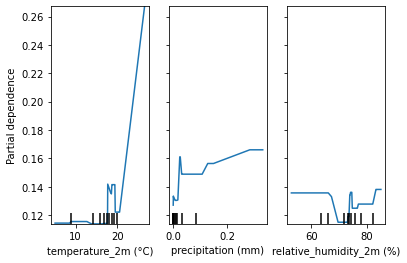

In [74]:
from sklearn.inspection import plot_partial_dependence

# Plot partial dependence for key features
key_features = ['temperature_2m (°C)', 'precipitation (mm)', 'relative_humidity_2m (%)']
plot_partial_dependence(xgb_model, X_test, key_features)
plt.show()


In [75]:
high_fire = df[df['high_alert'] == 1][features]
print("High Fire Counts Feature Means:")
print(high_fire.mean())


High Fire Counts Feature Means:
season                                       3.308571
month                                        8.102857
week                                        32.960000
temperature_2m (°C)                         19.103929
relative_humidity_2m (%)                    70.141190
precipitation (mm)                           0.033500
et0_fao_evapotranspiration (mm)              0.178805
vapour_pressure_deficit (kPa)                0.835679
wind_speed_10m (km/h)                       12.126881
soil_temperature_0_to_7cm (°C)              20.664310
soil_moisture_0_to_7cm (m³/m³)               0.141064
direct_normal_irradiance_instant (W/m²)    300.593048
dtype: float64


In [76]:
print(high_fire.std())

season                                      0.601416
month                                       1.517203
week                                        6.592167
temperature_2m (°C)                         3.515758
relative_humidity_2m (%)                    9.240537
precipitation (mm)                          0.067844
et0_fao_evapotranspiration (mm)             0.051497
vapour_pressure_deficit (kPa)               0.348321
wind_speed_10m (km/h)                       2.623547
soil_temperature_0_to_7cm (°C)              3.813663
soil_moisture_0_to_7cm (m³/m³)              0.061367
direct_normal_irradiance_instant (W/m²)    79.538858
dtype: float64


In [77]:
low_fire = df[df['high_alert'] == 0][features]
print("Low Fire Counts Feature Means:")
print(low_fire.mean())


Low Fire Counts Feature Means:
season                                       2.882890
month                                        6.745017
week                                        27.523256
temperature_2m (°C)                         15.577357
relative_humidity_2m (%)                    74.007821
precipitation (mm)                           0.039708
et0_fao_evapotranspiration (mm)              0.150774
vapour_pressure_deficit (kPa)                0.597784
wind_speed_10m (km/h)                       11.970449
soil_temperature_0_to_7cm (°C)              17.142701
soil_moisture_0_to_7cm (m³/m³)               0.182801
direct_normal_irradiance_instant (W/m²)    281.338611
dtype: float64


In [78]:
print(low_fire.std())

season                                      0.864864
month                                       2.517798
week                                       10.920475
temperature_2m (°C)                         4.535791
relative_humidity_2m (%)                    5.887160
precipitation (mm)                          0.071569
et0_fao_evapotranspiration (mm)             0.048418
vapour_pressure_deficit (kPa)               0.238383
wind_speed_10m (km/h)                       2.717183
soil_temperature_0_to_7cm (°C)              5.143733
soil_moisture_0_to_7cm (m³/m³)              0.083412
direct_normal_irradiance_instant (W/m²)    72.368410
dtype: float64


In [79]:
corr = df.corr()
print("Correlation with High Alert Counts:")
print(corr['high_alert'].sort_values(ascending=False))


Correlation with High Alert Counts:
high_alert                                 1.000000
alert__count                               0.783563
vapour_pressure_deficit (kPa)              0.298493
temperature_2m (°C)                        0.257748
soil_temperature_0_to_7cm (°C)             0.229397
soil_temperature_7_to_28cm (°C)            0.227418
soil_temperature_28_to_100cm (°C)          0.211036
dew_point_2m (°C)                          0.193162
et0_fao_evapotranspiration (mm)            0.188695
soil_temperature_100_to_255cm (°C)         0.188130
month                                      0.184714
day_of_year                                0.175255
week                                       0.170935
season                                     0.167757
year                                       0.130221
direct_radiation_instant (W/m²)            0.097938
sunshine_duration (s)                      0.087851
direct_normal_irradiance_instant (W/m²)    0.087560
subregion                   

                                               min         25%         50%  \
temperature_2m (°C)                       8.844048   17.812500   19.305357   
relative_humidity_2m (%)                 52.791667   63.440476   73.517857   
precipitation (mm)                        0.000000    0.000000    0.003571   
et0_fao_evapotranspiration (mm)           0.057083    0.155536    0.191131   
vapour_pressure_deficit (kPa)             0.244524    0.631190    0.758095   
wind_speed_10m (km/h)                     7.463095   10.320238   12.439286   
soil_temperature_0_to_7cm (°C)            8.925000   18.913690   20.604167   
soil_moisture_0_to_7cm (m³/m³)            0.097875    0.107679    0.113750   
direct_normal_irradiance_instant (W/m²)  92.613095  287.964286  328.675000   

                                                75%         max  
temperature_2m (°C)                       20.339881   26.552976  
relative_humidity_2m (%)                  76.083333   83.541667  
precipitation (mm)   

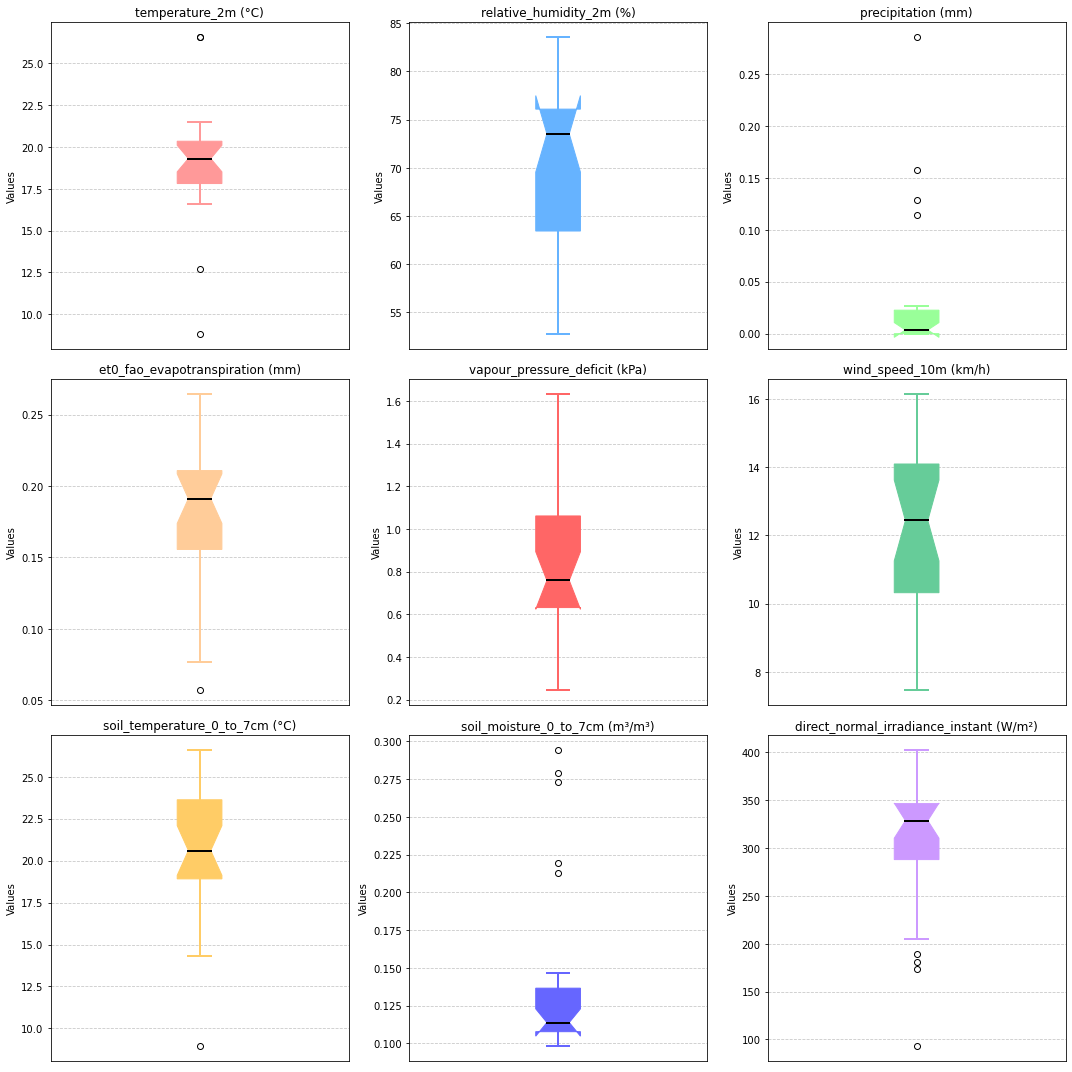

In [80]:
# List of features to analyze
boxplotfeatures = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 
                   'precipitation (mm)', 'et0_fao_evapotranspiration (mm)',
                   'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)', 
                   'soil_temperature_0_to_7cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)', 
                   'direct_normal_irradiance_instant (W/m²)']

# Calculate and print summary statistics
summary_stats = high_fire[boxplotfeatures].describe().T[['min', '25%', '50%', '75%', 'max']]
print(summary_stats)

# Create 3x3 subplots for box plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# List of colors for each boxplot
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FF6666', '#66CC99', '#FFCC66', '#6666FF', '#CC99FF']

# Iterate over features and corresponding subplot axes
for i, feature in enumerate(boxplotfeatures):
    ax = axes[i // 3, i % 3]  # Determine subplot position
    bp = ax.boxplot(high_fire[feature].dropna(), patch_artist=True, notch=True, boxprops=dict(facecolor=colors[i], color=colors[i]), 
                    whiskerprops=dict(color=colors[i], linewidth=2), capprops=dict(color=colors[i], linewidth=2),
                    medianprops=dict(color='black', linewidth=2))

    ax.set_title(feature)
    ax.set_ylabel('Values')
    ax.set_xticks([])  # Hide x-axis ticks
    ax.grid(True, linestyle='--', alpha=0.7)  # Add gridlines

# Remove empty subplots
for i in range(len(boxplotfeatures), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [81]:
# Load the dataset with specified encoding
weatherforecasts = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\weatherforecasts.csv", encoding='ISO-8859-1')

In [82]:
# Convert 'time' column to datetime and set it as the index
weatherforecasts['time'] = pd.to_datetime(weatherforecasts['time'])
weatherforecasts.set_index('time', inplace=True)

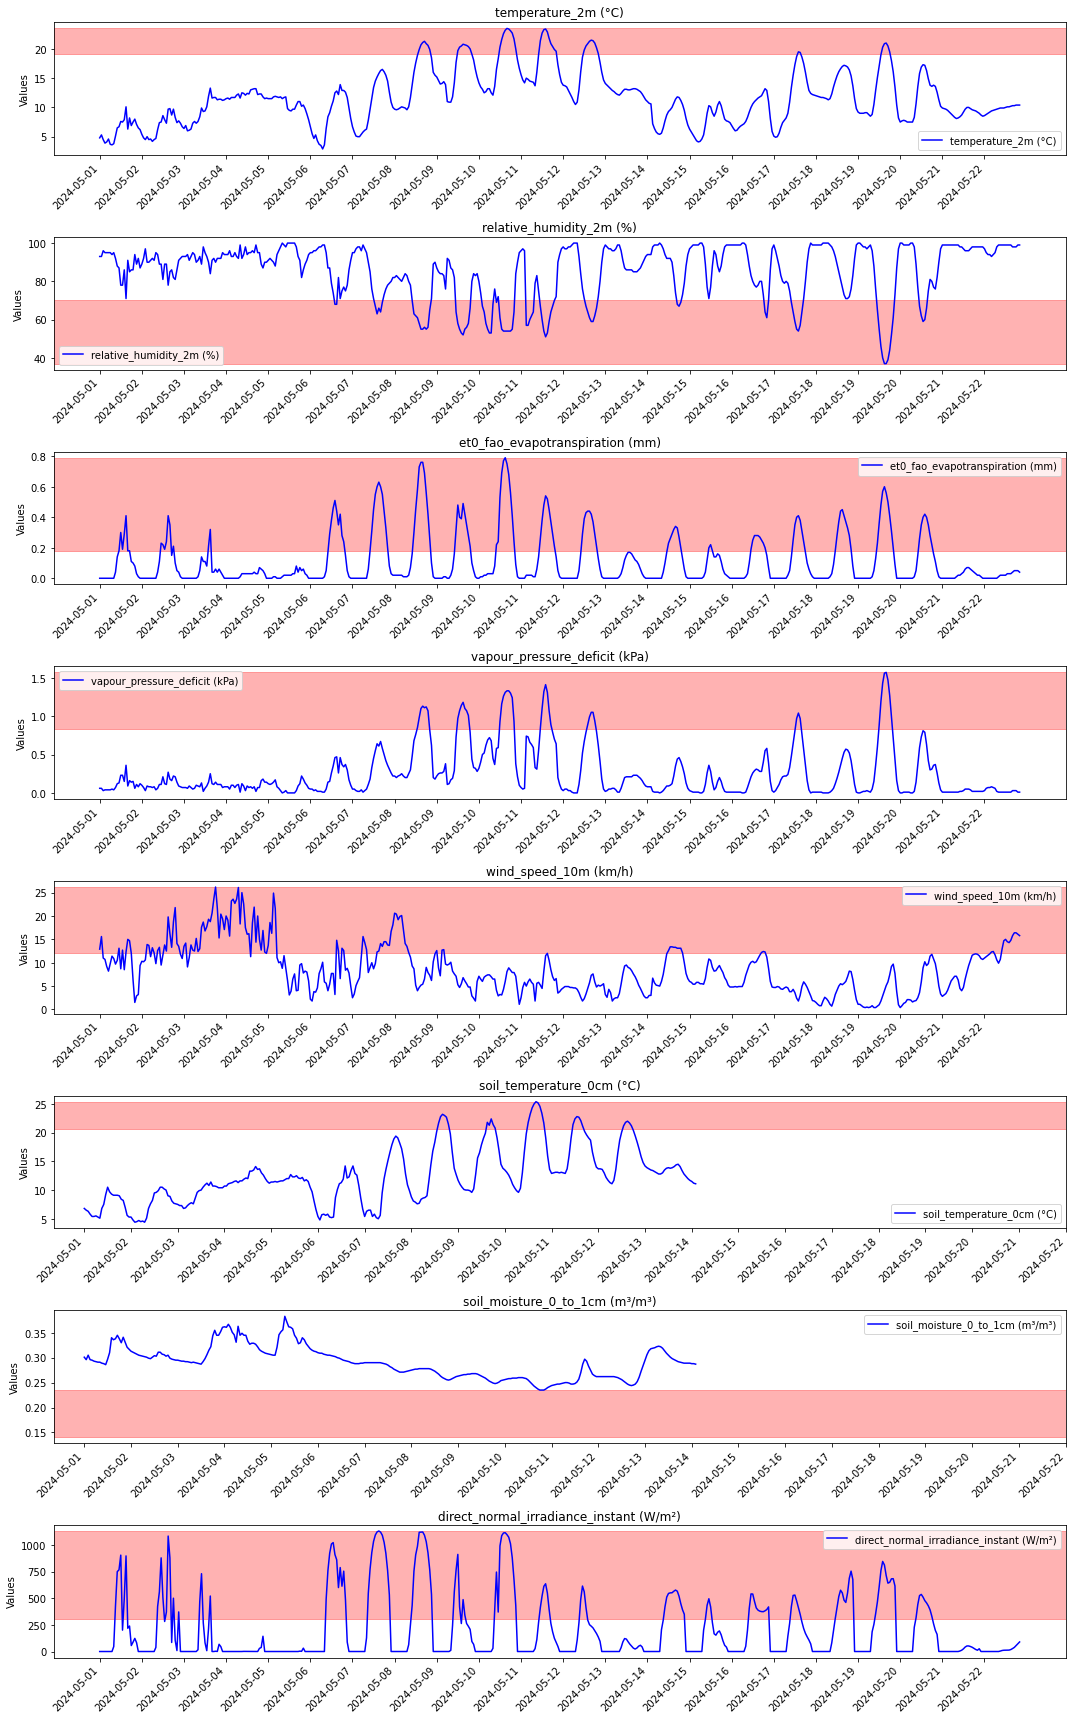

In [83]:
# Define features and their thresholds
features = {
    'temperature_2m (°C)': ('above', 19.103929),
    'relative_humidity_2m (%)': ('below', 70.141190),
    'et0_fao_evapotranspiration (mm)': ('above', 0.178805),
    'vapour_pressure_deficit (kPa)': ('above', 0.835679),
    'wind_speed_10m (km/h)': ('above', 12.126881),
    'soil_temperature_0cm (°C)': ('above', 20.664310),
    'soil_moisture_0_to_1cm (m³/m³)': ('below', 0.141064),
    'direct_normal_irradiance_instant (W/m²)': ('above', 300.593048)
}

# Set up the subplots
fig, axes = plt.subplots(len(features), 1, figsize=(15, len(features) * 3))

# Plot each feature in a separate subplot
for i, (feature, (condition, threshold)) in enumerate(features.items()):
    ax = axes[i]
    ax.plot(weatherforecasts.index, weatherforecasts[feature], label=feature, color='blue')
    
    # Add the threshold zone
    if condition == 'above':
        ax.axhspan(threshold, weatherforecasts[feature].max(), color='red', alpha=0.3)
    else:
        ax.axhspan(weatherforecasts[feature].min(), threshold, color='red', alpha=0.3)
    
    ax.set_title(f'{feature}')
    ax.set_ylabel('Values')
    ax.legend()

    # Customize the x-axis
    ax.set_xticks(weatherforecasts.index[::24])  # Show one tick for each day
    ax.set_xticklabels(weatherforecasts.index[::24].strftime('%Y-%m-%d'), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [84]:
# Define features and their thresholds
features = {
    'temperature_2m (°C)': ('above', 19.103929),
    'relative_humidity_2m (%)': ('below', 70.141190),
    'et0_fao_evapotranspiration (mm)': ('above', 0.178805),
    'vapour_pressure_deficit (kPa)': ('above', 0.835679),
    'wind_speed_10m (km/h)': ('above', 12.126881),
    'soil_temperature_0cm (°C)': ('above', 20.664310),
    'soil_moisture_0_to_1cm (m³/m³)': ('below', 0.141064),
    'direct_normal_irradiance_instant (W/m²)': ('above', 300.593048)
}

# Set up subplots
fig = make_subplots(rows=len(features), cols=1, subplot_titles=list(features.keys()))

# Plot each feature in a separate subplot
for i, (feature, (condition, threshold)) in enumerate(features.items(), start=1):
    # Add line plot
    fig.add_trace(go.Scatter(
        x=weatherforecasts.index,
        y=weatherforecasts[feature],
        mode='lines',
        name=feature,
        hoverinfo='x+y',
        line=dict(color='blue')
    ), row=i, col=1)

    # Add the threshold zone
    if condition == 'above':
        fig.add_shape(
            type='rect',
            x0=weatherforecasts.index.min(),
            x1=weatherforecasts.index.max(),
            y0=threshold,
            y1=weatherforecasts[feature].max(),
            fillcolor='red',
            opacity=0.3,
            line_width=0,
            row=i, col=1
        )
    else:
        fig.add_shape(
            type='rect',
            x0=weatherforecasts.index.min(),
            x1=weatherforecasts.index.max(),
            y0=weatherforecasts[feature].min(),
            y1=threshold,
            fillcolor='red',
            opacity=0.3,
            line_width=0,
            row=i, col=1
        )

    # Update x-axis for each subplot
    fig.update_xaxes(tickmode='array', tickvals=weatherforecasts.index[::24], ticktext=weatherforecasts.index[::24].strftime('%Y-%m-%d'), tickangle=45, row=i, col=1)

    # Update y-axis for each subplot
    fig.update_yaxes(showgrid=True, tickmode='auto', nticks=15, row=i, col=1)

# Update layout
fig.update_layout(height=len(features) * 300, showlegend=True, hovermode='x unified')

# Show plot
fig.show()


In [85]:
# Load data
irre_data = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\irreplacibility.csv")
fire_data = pd.read_csv(r"C:\Users\45502\Desktop\galicia\final datasets\fire_risk.csv")

In [86]:
# Function to create polygons from corner coordinates
def create_polygon(row):
    points = [(row[f'lon-{i}'], row[f'lat-{i}']) for i in range(1, 5)]
    return Polygon(points)

# Filter data within the latitude and longitude range
def filter_data(data):
    lon_filtered = data.loc[
        (data['lon-1'] >= -9.3) & (data['lon-1'] <= -6.73) &
        (data['lon-2'] >= -9.3) & (data['lon-2'] <= -6.73) &
        (data['lon-3'] >= -9.3) & (data['lon-3'] <= -6.73) &
        (data['lon-4'] >= -9.3) & (data['lon-4'] <= -6.73)
    ]
    
    lat_filtered = lon_filtered.loc[
        (lon_filtered['lat-1'] >= 41.8) & (lon_filtered['lat-1'] <= 43.8) &
        (lon_filtered['lat-2'] >= 41.8) & (lon_filtered['lat-2'] <= 43.8) &
        (lon_filtered['lat-3'] >= 41.8) & (lon_filtered['lat-3'] <= 43.8) &
        (lon_filtered['lat-4'] >= 41.8) & (lon_filtered['lat-4'] <= 43.8)
    ]
    
    return lat_filtered

irre_data = filter_data(irre_data)
fire_data = filter_data(fire_data)

# Create GeoDataFrames
irre_data['geometry'] = irre_data.apply(create_polygon, axis=1)
fire_data['geometry'] = fire_data.apply(create_polygon, axis=1)

gdf_irre = gpd.GeoDataFrame(irre_data, geometry='geometry')
gdf_fire = gpd.GeoDataFrame(fire_data, geometry='geometry')

# Function to plot choropleth map
def plot_choropleth(gdf, column, title, color_scale='Purples'):
    gdf['center'] = gdf['geometry'].centroid
    gdf['lon'] = gdf['center'].x
    gdf['lat'] = gdf['center'].y
    
    fig = px.choropleth_mapbox(gdf, geojson=gdf.geometry.__geo_interface__, 
                               locations=gdf.index, color=column,
                               mapbox_style="carto-positron", center={"lat": 42.7, "lon": -8.015},
                               zoom=7, opacity=0.6, color_continuous_scale=color_scale)
    
    fig.update_geos(fitbounds="locations", visible=False)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, title=title)
    fig.show()

# Plot Irreplaceability-score_rank map
plot_choropleth(gdf_irre, 'Irreplaceability-score_rank', 'Irreplaceability Score Rank')

# Plot Aggregated-fire-risk map using the 'Reds' palette
plot_choropleth(gdf_fire, 'Aggregated-fire-risk', 'Aggregated Fire Risk', color_scale='Reds')
